#### Introduction to Optimization - Final Project


## Soccer Manager Squad Optimization Problem

#### Adithya Murali (murali5@wisc.edu), Nikhil Kannan (nkannan2@wisc.edu), Utkarsh Jain (ujain6@wisc.edu), Krishna Raju

### Table of Contents


### Table of Contents
1. [Introduction](#1.-Introduction)
    1. [Background](#1.A-Background)
    1. [Definitions](#1.B-Definitions)
    1. [Outline](#1.C-Outline)
1. [Building Optimal Playing Eleven](#2.-Building-Optimal-Playing-Eleven)
    1. [Optimal Squad Mathematical Model](#2.A-Optimal-Squad-Mathematical-Model)
    1. [Optimal Squad Solution](#2.B-Optimal-Squad-Solution)
1. [Optimizing For Team Chemistry](#3.-Optimizing-For-Team-Chemistry)
    1. [Mathematical Model](#3.A-Mathematical-Model)
    1. [Solution](#3.B-Solution)
    1. [Trade-off between Chemistry and Overall](#3.C-Trade-off-between-Chemistry-and-Overall)
   
1. [Buying Players](#4.-Buying-Players)
    1. [Modelling Least Squares Regression to find traits](#4.A-Modelling-Least-Squares-Regression-to-find-traits)
    1. [Using traits to inform us on future purchases](#4.B-Using-traits-to-inform-us-on-future-purchases)
1. [Results](#Results)
1. [Conclusion](#Conclusion)


# 1. Introduction

This report is created to explore the problem of building an optimal soccer squad. In the past, soccer teams have been constructed through methods such as scouting for young talent or buying new players without taking into account talent gaps within their own clubs. We seek to explore a new strategy through which soccer team managers can build and improve their teams using players at hand and taking into consideration realistic scenarios such as balancing their teams overall rating versus team chemistry and optimally purchasing players to create more balanced squads while staying under the football clubs budget.


### 1.A Background

Major soccer clubs as FC Barcelona and Manchester United have risen to dominance due to
their ability to establish some of the [best youth academies](https://www.thesportster.com/soccer/top-20-academies-in-world-soccer/), giving rise to players like
[Lionel Messi](https://en.wikipedia.org/wiki/Lionel_Messi) and [David Beckham](https://en.wikipedia.org/wiki/David_Beckham) . Over time, such clubs have been able to make a name for themselves and simultaneously attracting the best talent. Furthermore, such clubs have risen to glory through winning multiple editions of competitions such as the Champions League, English Premier League and La Liga. This has propelled such teams not only to the top of the soccer world, but also made them the richest. With deep pockets, they are able to afford [some of the most expensive players in the world](https://www.thoughtco.com/most-expensive-soccer-players-3557640).

Meanwhile, mid to low-tier teams have struggled to dethrone their well-off rivals due to various factors. Teams such as Liverpool, who compete in the English Premier League, have [not won the title since 1990](https://en.wikipedia.org/wiki/1989%E2%80%9390_Football_League). Such teams either are unable to attract phenomenal talent due to lack of winning trophies or lose their own youth talent to richer clubs. For such teams, a large factor to winning competitions is dependent on being able to use players at hand effectively and buying good players with their limited resources.

The data for this analysis was obtained [here](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)

### 1.B Definitions

**Attribute** : A players attribute is an individual skill that tells us about his a characteristic of a player that determines his ability on the soccer pitch. Each attribute ranges from 0 to 99. For example, a player with an Accuracy attribute of 90 determines that he is more capable of placing shots into goal as opposed to a player with Accuracy of 60.  

**Overall** : Every player in a team has an overall rating, which is used to guage the ability of a player. Players with higher ratings are considered to be better and vice versa. It is calculated as a factor of their individual attributes.  

**Chemistry** : This defines how a player is able to "sync" with other players in his  vicinity or whom is he more likely to receive from or send passes to during a soccer game.  

**Preferred Positions** : Every player in a team has a preferred position on the pitch. This defines where the player would have the most impact in the game and can perform to the best of their abilities

**Formation** : This referres to an arrangement of players on the pitch based on their preferred positions and the kind of game that the team wants to play. For example, A team that intends to play a more offensive game would pursue the a [3-5-2](http://www.soccermaniak.com/3-5-2-soccer-formation.html) formation, which include 3 defenders, 5 midfielders and 2 strikers. As illustrated below: 
#### Figure 1
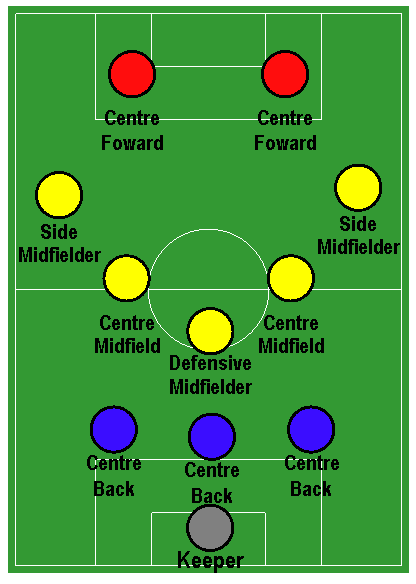

### 1.C Outline

In this project, we assume that we are the manager of Liverpool FC. Using data given by FIFA 18 dataset, we construct an optimal team using players already present within the club.The construction of our optimal squad is loosely based on the popular videogame FIFA 18, published by EA Sports. To quantify factors such as player overall and chemistry, we use restrictions and policies outlined in the game.   

First issue that we deal with revolves around building the best playing eleven that we can field for a any game. Though this sounds like a simplistic problem, factors such as player's preferred positions, and attributes play an important role in the selection of the team.  

In the second issue, we tackle the problem of incorporating chemistry while mainating our overall team rating. In the context of this problem, we account for chemistry as a link between adjacently positioned players on the pitch, which depends on the following three factors  
* Adjacent players are from the same club
* Each player plays in their preferred positions
* Adjacent players are from the same country
We will notice that the first two of the three conditions are already incorporated within our models. The third condition presents a trade off problem between maximizing our teams overall, while simulteanously maximizing team chemistry.  

Our third issue is concerned with constructing a more balanced team through purchasing players from other clubs. As a club with a limited budget, we must take into account the cost of each player and the kind of performance increase they bring to the club as whole.

# 2. Building Optimal Playing Eleven

In [12]:
using DataFrames

# read in the fifa 18 dataset
dataset = readtable("../data/modifiedCompleteDataset.csv")

df = DataFrame(dataset)

# extract all premier league teams in 2016-17
teams = ["Chelsea","Tottenham Hotspur","Manchester City","Liverpool","Arsenal","Manchester United",
    "Everton","Southampton","Bournemouth","West Bromwich Albion","West Ham United","Leicester City",
    "Stoke City", "Crystal Palace","Swansea City","Burnley","Watford","Hull City","Middlesbrough","Sunderland"]

my_team = "Liverpool"

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #readtable#233(::Bool, ::Char, ::Array{Char,1}, ::Char, ::Array{String,1}, ::Array{String,1}, ::Array{String,1}, ::Bool, ::Int64, ::Array{Symbol,1}, ::Array{Any,1}, ::Bool, ::Char, ::Bool, ::Int64, ::Array{Int64,1}, ::Bool, ::Symbol, ::Bool, ::Bool, ::DataFrames.#readtable, ::String) at /home/adithya/.julia/v0.6/DataFrames/src/deprecated.jl:1050
 [3] readtable(::String) at /home/adithya/.julia/v0.6/DataFrames/src/deprecated.jl:1050
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String, ::String) at /home/adithya/.julia/v0.6/Compat/src/Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/adithya/.julia/v0.6/IJulia/src/execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/adithya/.julia/v0.6/Compat/src/Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at /home/adithya/.julia/v0.6/IJulia/src

"Liverpool"

In [13]:
## narrow down the dataset to only teams in the premier league(defined in the teams variable)

premierLeagueTeamPlayerIndices = []

for i in 1:nrow(df) # iterate through teh dataframe
    if in(df[i, 9],teams) == true # check if it is a Premier League team
        push!(premierLeagueTeamPlayerIndices, i) ## add this index into our array
    end
end

 # narrow down to premier league players
premierLeagueTeamPlayers = df[Array{Int}(premierLeagueTeamPlayerIndices),:]
# from the players in the premier league, obtain players for my team
myteamPlayers = premierLeagueTeamPlayers[premierLeagueTeamPlayers[:,9] .== my_team,:]

,x,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,Free_kick_accuracy,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Heading_accuracy,Interceptions,Jumping,Long_passing,Long_shots,Marking,Penalties,Positioning,Reactions,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred_Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
1,55,Coutinho,25,https://cdn.sofifa.org/48/18/players/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,89,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,5.6e7,€205K,2049,88,55,92,92,88,85,77,84,88,74,82,12,7,9,14,6,47,30,59,78,86,24,64,83,81,85,80,40,77,80,44,61,87,75,85.0,49.0,61.0,83.0,79.0,189242.0,85.0,60.0,49.0,79.0,61.0,83.0,83.0,77.0,84.0,64.0,CAM LW,85.0,60.0,49.0,79.0,61.0,83.0,83.0,77.0,84.0,64.0,77.0
2,98,S. Mané,25,https://cdn.sofifa.org/48/18/players/208722.png,Senegal,https://cdn.sofifa.org/flags/136.png,84,87,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,3.9e7,€175K,2046,94,73,89,85,84,78,72,74,86,83,64,10,10,15,7,14,53,31,75,71,69,33,71,84,80,77,77,38,92,82,35,72,78,68,81.0,51.0,60.0,82.0,74.0,208722.0,81.0,60.0,51.0,74.0,60.0,82.0,82.0,79.0,83.0,63.0,LW RW,81.0,60.0,51.0,74.0,60.0,82.0,82.0,79.0,83.0,63.0,79.0
3,138,M. Salah,25,https://cdn.sofifa.org/48/18/players/209331.png,Egypt,https://cdn.sofifa.org/flags/111.png,83,86,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,3.2e7,€135K,2032,93,63,86,84,87,75,73,70,87,79,60,14,14,9,11,14,59,55,70,65,62,37,61,83,82,79,71,41,93,77,43,61,78,71,81.0,56.0,64.0,82.0,75.0,209331.0,81.0,64.0,56.0,75.0,64.0,82.0,82.0,78.0,83.0,68.0,RW,81.0,64.0,56.0,75.0,64.0,82.0,82.0,78.0,83.0,68.0,78.0
4,146,Roberto Firmino,25,https://cdn.sofifa.org/48/18/players/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,87,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,3.4e7,€135K,2101,77,66,82,81,85,78,72,80,87,83,67,8,11,9,6,10,72,37,81,75,80,30,72,84,82,83,79,42,77,86,59,76,83,79,83.0,58.0,65.0,83.0,79.0,201942.0,83.0,63.0,58.0,79.0,65.0,83.0,82.0,81.0,82.0,66.0,CAM CF ST,83.0,63.0,58.0,79.0,65.0,83.0,82.0,81.0,82.0,66.0,81.0
5,152,J. Matip,25,https://cdn.sofifa.org/48/18/players/197061.png,Cameroon,https://cdn.sofifa.org/flags/103.png,83,85,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.6e7,€110K,1884,60,81,58,49,71,75,54,63,65,36,22,11,15,10,7,10,85,85,67,74,48,83,42,51,81,77,66,79,73,73,85,81,72,50,66.0,82.0,79.0,64.0,72.0,197061.0,66.0,76.0,82.0,72.0,79.0,64.0,66.0,63.0,63.0,75.0,CB,66.0,76.0,82.0,72.0,79.0,64.0,66.0,63.0,63.0,75.0,63.0
6,172,A. Lallana,29,https://cdn.sofifa.org/48/18/players/180819.png,England,https://cdn.sofifa.org/flags/14.png,83,83,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.5e7,€135K,2141,74,74,83,76,86,80,74,77,85,79,66,6,15,14,8,11,67,68,73,77,72,60,70,77,78,86,72,62,72,90,67,67,83,72,82.0,69.0,75.0,80.0,81.0,180819.0,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,CM,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,77.0
7,249,N. Clyne,26,https://cdn.sofifa.org/48/18/players/190456.png,England,https://cdn.sofifa.org/flags/14.png,82,84,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.2e7,€115K,2057,82,76,83,76,76,75,79,64,76,54,39,10,11,13,15,7,67,79,69,67,69,81,46,72,76,77,74,86,83,87,83,71,64,45,73.0,78.0,77.0,72.0,74.0,190456.0,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,RB,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,70.0
8,262,J. Henderson,27,https://cdn.sofifa.org/48/18/players/183711.png,England,https://cdn.sofifa.org/flags/14.png,82,84,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.1e7,€115K,2183,73,80,73,71,80,78,81,80,74,67,74,7,13,7,9,13,65,79,81,83,71,73,64,76,79,85,75,76,71,93,80,76,82,72,78.0,77.0,81.0,76.0,81.0,183711.0,78.0,79.0,77.0,81.0,81.0,76.0,78.0,74.0,76.0,80.0,CM CDM,78.0,79.0,77.0,81.0,81.0,76.0,78.0,74

### 2.A Optimal Squad Mathematical Model

The first model is an integer linear program with binary variables.  

We define the positions that any player in the dataset can take, this is given by the list `position_labels`. It consists of character indicators for each possible position. They are given as follows:
* ST : Striker
* LW : Left Winger
* RW : Right Winger
* GK : Goal Keeper
* CDM : Central Defence Midfielder
* CM : Center Midfielder
* CB : Center Back
* RM : Right Midfielder
* CAM : Center Attacking Midfielder
* LM : Left Midfielder
* LB : Left Back
* CF : Center Forward
* RB : Right Back
* RWB : Right Wing Back
* LWB : Left Wing Back

The `createSquadPosition` function returns a sparse matrix indicating the preferred position of each player 

The `positions` symbol stores the output of the `createSquadPosition`

The `formation` is a list that contains the number of times a position occurs in a formation. The index of this list corresponds to `position_labels`

The `overall` contains a list of the overall rating for every player in the squad


This model consists of two variables. The first variable decides which player from our club is picked to play in the final playing eleven. It is defined as 'my_squad' and indicates 1 if a player is chosen and 0 if not.

The second variable is a matrix in which the rows correspond to the number of players in the football club and the columns correspond to all possible positions on the pitch, as indicated by `position_labels`. This variable is called 'position_preference'

The model involves three constraints. 

The first constraint is to ensure that only a given number of players are allowed to play in certain positions. As mentioned previously, the number of players that can play in a position is defined by the `formation` array. In this model, we incorporate the 4-3-3 formation, as illustrated below: 

#### Figure 2
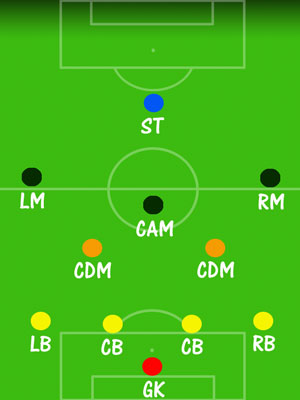 

For example, the above picture shows us that only one player can play as a striker, while two players can play as center backs and center defence midfielders. 
This constraint is illustrated as follows:

$$
\sum_{i = 1}^{N} positions_{i,j}^{T} \cdot position \_ preference_{i,j} = formation_{j}  \hspace{4ex} j = \{1,\dots,P\}
$$

The second constraint ensures that either a player is picked or not picked for a given position, since one players cannot play different positions (theoretically)

$$
0 <= \sum_{i=1}^{N} position \_ preference_{i,j} <= 1 \hspace{4ex} j = \{1, \dots, P\}
$$

The third constraint simply ensures that we pick 11 players
$$
\sum_{i = 1}^{N} \sum_{j=1}^{P} position \_ preference_{i,j} = 11
$$

In our objective, maximize the overall rating of the team by choosing the appropriate players from our club. The value of the objective gives us the sum of individual ratings of the best playing eleven we can construct from our club

$$
\begin{aligned}
\underset{position \_preference \in \{0,1\}}{\text{maximize}} &&
\sum_{i}^{N} overall_{i}^T \cdot position \_ preference_{i,j} && j = \{1,\dots,P\}  \\
\end{aligned}
$$

To summarize the model

$$
\begin{aligned}
\underset{position \_preference \in \{0,1\}}{\text{maximize}} && \sum_{i}^{N} overall_{i}^T \cdot position \_ preference_{i,j} && j = \{1,\dots,P\}  \\
\text{subject to:} && \sum_{i = 1}^{N} positions_{i,j}^{T} \cdot position \_ preference_{i,j} = formation_{j} && j = \{1,\dots,P\}\\
&& \displaystyle 0 <= \sum_{j=1}^{P} position \_ preference_{i,j} <= 1 && i = \{1, \dots, N\} \\
&& \displaystyle \sum_{i = 1}^{N} \sum_{j=1}^{P} position \_ preference_{i,j} = 11 && i = \{1, \dots, N\} && j = \{1,\dots,P\} \\
\end{aligned}
$$



### 2.B Optimal Squad Solution

In [18]:
## the following function will take your existing squad and optimize it to be the best it can be for a given game
## For sake of simplicity, we will assume that every team always plays the regular (and debatably effective) 4-3-3 formation. 
## This involves 4 defenders, 3 midfielders and 3 strikers

# returns a sparse matrix indicating player positions
# takes as input the dataframe of your team (eg: Southampton)
positions_labels = ["ST","LW","RW","GK","CDM","CM","CB","RM","CAM","LM","LB","CF","RB","RWB","LWB"]

function createSquadPosition(team_df)
    positionsMatrix = Array{Int}(nrow(team_df),length(positions_labels)) # initialize an array to hold positions
    for i in 1:nrow(team_df)
        preferredPos =  split(lstrip(rstrip(team_df[i, 64])))
        positionsMatrix[i,:] = 0
        for j in 1:length(preferredPos) # locate the position definition
            f(x) = x .== preferredPos[j]
            positionsMatrix[i,find(f, positions_labels)[1]] = 1
        end
    end
    return positionsMatrix
end


using JuMP, Cbc

squad = myteamPlayers
positions = createSquadPosition(squad) # get preferred positions of each player (returns a sparse matrix)
formation = [1,1,1,1,2,1,2,0,0,0,1,0,1,0,0] # 4-3-3 formation
overall = squad[:,7]

m = Model(solver=CbcSolver())
@variable(m, my_squad[1:nrow(squad)], Bin) # create a variable to hold 33 players
@variable(m, position_preference[1:nrow(squad),1:length(positions_labels)], Bin) # holds player preference positions

# constraint to pick preferred player
for j in 1:length(formation)
    @constraint(m, sum(positions[i,j]*(position_preference[i,j]) for i in 1:nrow(squad)) == formation[j])
end

#constraint to ensure that only one player is picked per position
for j in 1:nrow(squad)
    @constraint(m,  0 <= sum(position_preference[j,:]) <= 1)
end

# constraint to ensure that only 11 players are picked in a team
@constraint(m, sum(position_preference) == 11)

# maximize the overall team rating 
@objective(m, Max, sum(sum(position_preference[i,:])*overall[i] for i in 1:nrow(squad)))
solve(m)

selection = []
for i in 1:nrow(squad)
    if(sum(getvalue(position_preference)[i,:]) == 1)
        push!(selection, i)
    end
end
squad[Array{Int}(selection),[2,3,5,7]]


,Name,Age,Nationality,Overall
1,Coutinho,25,Brazil,86
2,S. Mané,25,Senegal,84
3,Roberto Firmino,25,Brazil,83
4,J. Matip,25,Cameroon,83
5,A. Lallana,29,England,83
6,N. Clyne,26,England,82
7,J. Henderson,27,England,82
8,D. Lovren,27,Croatia,81
9,S. Mignolet,29,Belgium,81
10,E. Can,23,Germany,80


In [19]:
println("The average team rating of our best squad : ", round(sum(transpose(overall)*getvalue(position_preference))/11))

The average team rating of our best squad : 82.0


## 3. Optimizing For Team Chemistry

In the context of the game, chemistry is defined as the connection /sync between two players who are likely to be ineractive with eac other during the course of the game. This interaction is defined as an understanding of the finer attributes of teammates. For example, in the case of our 4-3-3 formation it is important that a striker has a good chemistry with his neighbouring player the left winger, right winger, and the central  midfielder. This chemistry is beneficial to constructing plays that will result in goals. For example, a striker, who has good chemistry with his neighbouring players, develops an understanding that enables the striker to position himself in such a manner so as to create plays that can effectively penetrate the opposing teams defense. 

#### Figure 3

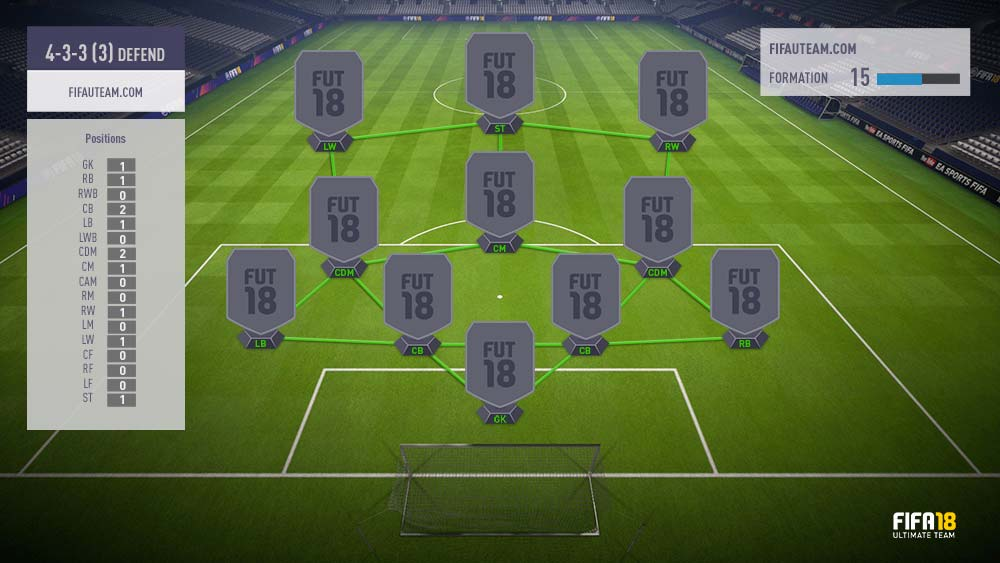

In the illustration above, we notice that the 3 links/edges that connect the striker to his neighbours.
As mentioned in the background, the factors that affect chemistry and position have already been satisfied, as we chose players from the same club and allocate players based on their preferred position, as done in the previous model. Now, we build over this model to include chemistry as a factor that affects the gameplay. 

Our attempt at including chemistry will ensure that more players from the same country play in positions that boost linkups.

### 3.A Mathematical Model

Prior to defining variables and functions, it is important to note that each position will now be considered
as a seperate entity. For example, our `formation` array indicated the number of players in each position, but it did not consider each position to be unique. So, instead of having 2 CB's, we will now have CB1 and CB2. This is critical as we will need to determine the chemistry between the two centerbacks.



In this case, we use a integer linear program. Let 'N' remain the number of players in the club. P' now represents the number of positions that are possible in our squad including unique positions.In this problem, we consider nodes to be the positions and links between positions to be the edges. The `linkups` of  size P'xP' is an incidence matrix that indicates that a link exists between two positions.Similarly, the `positions` of size NxP' will also be modified to reflect the uniqueness of each position.`chemistry` is an NxN matrix that indicates whether two players within our team are from the same country. The rest remain the same. 

Let variable position_position' is a binary variable that indicates the selection of a player for a particular position of size NxP'. 

Our first constraint will ensures that each position is only occupied by one player. 

$$
0 <=\sum_{j = 1}^{P'} position \_ preference_{i,j}\cdot positions_{j}^{T} <= 1  \hspace{4ex} i = \{1,\dots,N\}
$$

As with our previous model, we need ensure that even though positions are unique, the number of players for each position sum up to the value in `formations` for that position. For example, in this model we consider players at CB1 and CB2 positions, but need to ensure that the number players for these positions both sum up to the value in formations for CB. 

Let us consider two sets X and Y, where X contains all positions which require only 1 player. For example, the above described 4-3-3 formation requires only one striker. The constraint for this can be represented as

 
$$
\sum_{i = 1}^{N} positions_{i,j}^{T} \cdot position \_ preference_{i,j} = formation_{j}  \hspace{4ex} j \in X
$$

Our second set Y contains subsets that correspond to two or more columns that account for unique positions. We must ensure that the sum of these unique positions equals the number of times these positions occur in the formation. This can be summarized as

$$
\sum_{i = 1}^{N} \sum_{k \in j}positions_{i,j_k}^{T} \cdot position \_ preference_{i,j_k} = formation_{j}  \hspace{4ex} j \in Y
$$


Ensure that each player does not occupy more than one position

$$
0 <= \sum_{i=1}^{N} position \_ preference_{i,j} <= 1 \hspace{4ex} j = \{1, \dots, P'\}
$$

Ensure that there are only 11 players in a team

$$
\sum_{i = 1}^{N} \sum_{j=1}^{P} position \_ preference_{i,j} = 11
$$


Let I denote a vector of size P' To summarize the model,

$$
\begin{aligned}
\underset{position \_preference \in \{0,1\}}{\text{maximize}} && \sum_{i}^{N} overall_{i}^T \cdot position \_ preference_{i,j} +  λ\cdot chemistry \cdot position\_preference \cdot linkup \cdot I && j = \{1,\dots,P'\}  \\
\text{subject to:} && 0 <=\sum_{j = 1}^{P'} position \_ preference_{i,j}\cdot positions_{j}^{T} <= 1  && i = \{1,\dots,N\}\\
&& \displaystyle \sum_{i = 1}^{N} positions_{i,j}^{T} \cdot position \_ preference_{i,j} = formation_{j}  && j \in X \\
&& \displaystyle \sum_{i = 1}^{N} \sum_{k \in j}positions_{i,j_k}^{T} \cdot position \_ preference_{i,j_k} = formation_{j}  && j \in Y \\
&& \displaystyle 0 <= \sum_{i=1}^{N} position \_ preference_{i,j} <= 1 && j = \{1, \dots, P'\} \\
&& \displaystyle \sum_{i = 1}^{N} \sum_{j=1}^{P} position \_ preference_{i,j} = 11 \\
\end{aligned}
$$



## 3.B Solution

In [20]:
# creates a sparse matrix that tells us whether two players are from the same country
function createChemistryMatrix(squad) 
    nationality = squad[:,5]
    chemistryMatrix = Array{Int}(nrow(squad),nrow(squad))
    for i in 1:length(nationality)
        chemistryMatrix[i,:] = 0
        chemistryMatrix[i,find(x -> x == nationality[i], nationality)] = 1
    end
    return chemistryMatrix
end

using JuMP, Cbc

# obtain our squad of players and set their formations
squad = myteamPlayers
positions = createSquadPosition(squad) # get preferred positions of each player (returns a sparse matrix)
formation = [1,1,1,1,2,1,2,0,0,0,1,0,1,0,0] # 4-3-3 formation
overall = squad[:,7]

#incidence matrix for 4-3-3 formation
# it tells us which position links up with which other position
# in the 4-3-3 formation. The neighboring players
# that a certain player links up with determines the chemistry
# at that position
linkups = [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
             1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 
             1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
             0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 
             0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
             0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 
             0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 
             0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 
             0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 
             0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
             0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
                    
chemistry = createChemistryMatrix(squad) # create chemistry matrix


# for positions in the formation array that have more than 2 players,
# they are in reality two different positions that perform the same function 
# and hence can be performed by players in the same region

# find positions with more than one player
duplicates = find(x-> x > 1, formation)
clone_columns = [] #  store the columns pertaining to the duplicate positions
# clone the columns of the duplicates to the right.
duplicate_col_pos = length(positions_labels)+1
for i in 1:length(duplicates)
    dupcol = []
    # repeat for formation[j]-1 times
    for j in 1:(formation[duplicates[i]] - 1)
        positions = hcat(positions, positions[:,duplicates[i]])
        push!(dupcol, duplicate_col_pos) # push this new column index
        duplicate_col_pos = duplicate_col_pos+1
    end
    push!(clone_columns, dupcol)
end
        

# create a model
m = Model(solver=CbcSolver())

#define the variable
@variable(m, position_preference[1:nrow(squad),1:size(positions)[2]], Bin) # holds player preference positions


# constraint to pick preferred player
for j in 1:length(formation) # now that we have split columns to identify unique positions, each positionw will sum up to be 1
    if formation[j] == 0 #if there are no players in a position, then make sure that the sum of that column is 0
        @constraint(m, sum(positions[i,j]*(position_preference[i,j]) for i in 1:nrow(squad)) == 0)
    else
        @constraint(m, sum(positions[i,j]*(position_preference[i,j]) for i in 1:nrow(squad)) == 1)
    end
end

# deal with multiple (unique) positions
# clone_columns and duplicates have the same size
for i in 1:length(clone_columns)
    
    # ensure that the sum of each clone column is 1, since each position is now treated as unique
    for j in 1:length(clone_columns[i])
        @constraint(m, sum(positions[k,clone_columns[i][j]]*(position_preference[k,clone_columns[i][j]]) for k in 1:nrow(squad)) == 1)
    end
    # ensure that the colsums of the clones and the original columns is equal to the number of occurances of that position in the formation vector
    @constraint(m, sum(position_preference[:, duplicates[i]]) +
            sum(sum(position_preference[:, clone_columns[i][k]]) for k in 1:length(clone_columns[i]))  
     == formation[duplicates[i]])
    
end

#constraint to ensure that only one player is picked per position
for j in 1:nrow(squad)
    @constraint(m,  0 <= sum(position_preference[j,:]) <= 1)
end

# constraint to ensure that only 11 players are picked in a team
@constraint(m, sum(position_preference) == 11)
lambda = 0.01;
# maximize the 0 overal4l team rating 
@objective(m, Max,
    sum(sum(position_preference[i,:])*overall[i] for i in 1:nrow(squad)) +
    vecdot((lambda*chemistry*position_preference*linkups)*ones(size(linkups)[1]),overall))
solve(m)

selection = []
for i in 1:nrow(squad)
    if(sum(getvalue(position_preference)[i,:]) == 1)
        push!(selection, i)
    end
end
squad[Array{Int}(selection),:]


,x,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,Free_kick_accuracy,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Heading_accuracy,Interceptions,Jumping,Long_passing,Long_shots,Marking,Penalties,Positioning,Reactions,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred_Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
1,55,Coutinho,25,https://cdn.sofifa.org/48/18/players/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,89,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,5.6e7,€205K,2049,88,55,92,92,88,85,77,84,88,74,82,12,7,9,14,6,47,30,59,78,86,24,64,83,81,85,80,40,77,80,44,61,87,75,85.0,49.0,61.0,83.0,79.0,189242.0,85.0,60.0,49.0,79.0,61.0,83.0,83.0,77.0,84.0,64.0,CAM LW,85.0,60.0,49.0,79.0,61.0,83.0,83.0,77.0,84.0,64.0,77.0
2,98,S. Mané,25,https://cdn.sofifa.org/48/18/players/208722.png,Senegal,https://cdn.sofifa.org/flags/136.png,84,87,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,3.9e7,€175K,2046,94,73,89,85,84,78,72,74,86,83,64,10,10,15,7,14,53,31,75,71,69,33,71,84,80,77,77,38,92,82,35,72,78,68,81.0,51.0,60.0,82.0,74.0,208722.0,81.0,60.0,51.0,74.0,60.0,82.0,82.0,79.0,83.0,63.0,LW RW,81.0,60.0,51.0,74.0,60.0,82.0,82.0,79.0,83.0,63.0,79.0
3,152,J. Matip,25,https://cdn.sofifa.org/48/18/players/197061.png,Cameroon,https://cdn.sofifa.org/flags/103.png,83,85,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.6e7,€110K,1884,60,81,58,49,71,75,54,63,65,36,22,11,15,10,7,10,85,85,67,74,48,83,42,51,81,77,66,79,73,73,85,81,72,50,66.0,82.0,79.0,64.0,72.0,197061.0,66.0,76.0,82.0,72.0,79.0,64.0,66.0,63.0,63.0,75.0,CB,66.0,76.0,82.0,72.0,79.0,64.0,66.0,63.0,63.0,75.0,63.0
4,172,A. Lallana,29,https://cdn.sofifa.org/48/18/players/180819.png,England,https://cdn.sofifa.org/flags/14.png,83,83,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.5e7,€135K,2141,74,74,83,76,86,80,74,77,85,79,66,6,15,14,8,11,67,68,73,77,72,60,70,77,78,86,72,62,72,90,67,67,83,72,82.0,69.0,75.0,80.0,81.0,180819.0,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,CM,82.0,73.0,69.0,81.0,75.0,80.0,81.0,77.0,80.0,75.0,77.0
5,249,N. Clyne,26,https://cdn.sofifa.org/48/18/players/190456.png,England,https://cdn.sofifa.org/flags/14.png,82,84,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.2e7,€115K,2057,82,76,83,76,76,75,79,64,76,54,39,10,11,13,15,7,67,79,69,67,69,81,46,72,76,77,74,86,83,87,83,71,64,45,73.0,78.0,77.0,72.0,74.0,190456.0,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,RB,73.0,81.0,78.0,74.0,77.0,72.0,75.0,70.0,74.0,81.0,70.0
6,262,J. Henderson,27,https://cdn.sofifa.org/48/18/players/183711.png,England,https://cdn.sofifa.org/flags/14.png,82,84,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.1e7,€115K,2183,73,80,73,71,80,78,81,80,74,67,74,7,13,7,9,13,65,79,81,83,71,73,64,76,79,85,75,76,71,93,80,76,82,72,78.0,77.0,81.0,76.0,81.0,183711.0,78.0,79.0,77.0,81.0,81.0,76.0,78.0,74.0,76.0,80.0,CM CDM,78.0,79.0,77.0,81.0,81.0,76.0,78.0,74.0,76.0,80.0,74.0
7,279,D. Sturridge,27,https://cdn.sofifa.org/48/18/players/171833.png,England,https://cdn.sofifa.org/flags/14.png,82,82,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,2.3e7,€140K,1882,74,60,75,64,81,81,62,62,80,83,68,7,15,9,5,13,73,22,72,62,80,15,75,84,82,74,83,12,78,68,24,71,74,75,78.0,44.0,51.0,80.0,70.0,171833.0,78.0,49.0,44.0,70.0,51.0,80.0,76.0,80.0,78.0,52.0,ST,78.0,49.0,44.0,70.0,51.0,80.0,76.0,80.0,78.0,52.0,80.0
8,373,S. Mignolet,29,https://cdn.sofifa.org/48/18/players/173426.png,Belgium,https://cdn.sofifa.org/flags/7.png,81,81,Liverpool,https://cdn.sofifa.org/24/18/teams/9.png,1.2e7,€91K,1266,55,34,34,42,24,66,11,16,14,11,12,80,76,65,78,84,16,21,69,34,16,13,41,16,77,37,45,16,56,31,14,72,40,16,0.0,0.0,0.0,0.0,0.0,173426.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,409,E. Can,2

In [21]:
println("The average team rating of our best squad : ", round(sum(transpose(overall)*getvalue(position_preference))/11))

The average team rating of our best squad : 81.0


## 3.C Trade off between Chemistry and Overall

In [8]:
lambdas = 0:0.0000001:0.0023
chemistry_values = []
j1 = []
j2 = []
for z in 0:0.0000001:0.0023
    # create a model
    m = Model(solver=CbcSolver())

    @variable(m, position_preference[1:nrow(squad),1:size(positions)[2]], Bin) # holds player preference positions


    # constraint to pick preferred player
    for j in 1:length(formation) # now that we have split columns to identify unique positions, we each positionw ill sum up to be 1
        if formation[j] == 0 #if there are no players in a position, then make sure that the sum of that column is 0
            @constraint(m, sum(positions[i,j]*(position_preference[i,j]) for i in 1:nrow(squad)) == 0)
        else
            @constraint(m, sum(positions[i,j]*(position_preference[i,j]) for i in 1:nrow(squad)) == 1)
        end
    end

    # deal with multiple positions
    # clone_columns and duplicates have the same size
    for i in 1:length(clone_columns)

        # ensure that the sum of each clone column is 1, since each position is now treated as unique
        for j in 1:length(clone_columns[i])
            @constraint(m, sum(positions[k,clone_columns[i][j]]*(position_preference[k,clone_columns[i][j]]) for k in 1:nrow(squad)) == 1)
        end
        # ensure that the colsums of the clones and the original columns is equal to the number of occurances of that position in the formation vector
        @constraint(m, sum(position_preference[:, duplicates[i]]) +
                sum(sum(position_preference[:, clone_columns[i][k]]) for k in 1:length(clone_columns[i]))  
         == formation[duplicates[i]])

    end

    #constraint to ensure that only one player is picked per position
    for j in 1:nrow(squad)
        @constraint(m,  0 <= sum(position_preference[j,:]) <= 1)
    end

    # constraint to ensure that only 11 players are picked in a team
    @constraint(m, sum(position_preference) == 11)

    lambda = z
    println(" Lambda = ",lambda) 
    @objective(m, Max,
    sum(sum(position_preference[i,:])*overall[i] for i in 1:nrow(squad)) +
    vecdot((lambda*chemistry*position_preference*linkups)*ones(size(linkups)[1]),overall))
    solve(m) )
    push!(chemistry_values,length(find(x-> x == 2,chemistry*getvalue(position_preference)*linkups))/11)
    push!(j1,sum(transpose(overall)*getvalue(position_preference)))
    push!(j2,sum(vecdot((lambda*chemistry*getvalue(position_preference)*linkups)*ones(size(linkups)[1]),overall)))
end



 Lambda = 0.0
 Lambda = 1.0e-7
 Lambda = 2.0e-7
 Lambda = 3.0e-7
 Lambda = 4.0e-7
 Lambda = 5.0e-7
 Lambda = 6.0e-7
 Lambda = 7.0e-7
 Lambda = 8.0e-7
 Lambda = 9.0e-7
 Lambda = 1.0e-6
 Lambda = 1.1e-6
 Lambda = 1.2e-6
 Lambda = 1.3e-6
 Lambda = 1.4e-6
 Lambda = 1.5e-6
 Lambda = 1.6e-6
 Lambda = 1.7e-6
 Lambda = 1.8e-6
 Lambda = 1.9e-6
 Lambda = 2.0e-6
 Lambda = 2.1e-6
 Lambda = 2.2e-6
 Lambda = 2.3e-6
 Lambda = 2.4e-6
 Lambda = 2.5e-6
 Lambda = 2.6e-6
 Lambda = 2.7e-6
 Lambda = 2.8e-6
 Lambda = 2.9e-6
 Lambda = 3.0e-6
 Lambda = 3.1e-6
 Lambda = 3.2e-6
 Lambda = 3.3e-6
 Lambda = 3.4e-6
 Lambda = 3.5e-6
 Lambda = 3.6e-6
 Lambda = 3.7e-6
 Lambda = 3.8e-6
 Lambda = 3.9e-6
 Lambda = 4.0e-6
 Lambda = 4.1e-6
 Lambda = 4.2e-6
 Lambda = 4.3e-6
 Lambda = 4.4e-6
 Lambda = 4.5e-6
 Lambda = 4.6e-6
 Lambda = 4.7e-6
 Lambda = 4.8e-6
 Lambda = 4.9e-6
 Lambda = 5.0e-6
 Lambda = 5.1e-6
 Lambda = 5.2e-6
 Lambda = 5.3e-6
 Lambda = 5.4e-6
 Lambda = 5.5e-6
 Lambda = 5.6e-6
 Lambda = 5.7e-6
 Lambda = 5.8e-6


 Lambda = 4.63e-5
 Lambda = 4.64e-5
 Lambda = 4.65e-5
 Lambda = 4.66e-5
 Lambda = 4.67e-5
 Lambda = 4.68e-5
 Lambda = 4.69e-5
 Lambda = 4.7e-5
 Lambda = 4.71e-5
 Lambda = 4.72e-5
 Lambda = 4.73e-5
 Lambda = 4.74e-5
 Lambda = 4.75e-5
 Lambda = 4.76e-5
 Lambda = 4.77e-5
 Lambda = 4.78e-5
 Lambda = 4.79e-5
 Lambda = 4.8e-5
 Lambda = 4.81e-5
 Lambda = 4.82e-5
 Lambda = 4.83e-5
 Lambda = 4.84e-5
 Lambda = 4.85e-5
 Lambda = 4.86e-5
 Lambda = 4.87e-5
 Lambda = 4.88e-5
 Lambda = 4.89e-5
 Lambda = 4.9e-5
 Lambda = 4.91e-5
 Lambda = 4.92e-5
 Lambda = 4.93e-5
 Lambda = 4.94e-5
 Lambda = 4.95e-5
 Lambda = 4.96e-5
 Lambda = 4.97e-5
 Lambda = 4.98e-5
 Lambda = 4.99e-5
 Lambda = 5.0e-5
 Lambda = 5.01e-5
 Lambda = 5.02e-5
 Lambda = 5.03e-5
 Lambda = 5.04e-5
 Lambda = 5.05e-5
 Lambda = 5.06e-5
 Lambda = 5.07e-5
 Lambda = 5.08e-5
 Lambda = 5.09e-5
 Lambda = 5.1e-5
 Lambda = 5.11e-5
 Lambda = 5.12e-5
 Lambda = 5.13e-5
 Lambda = 5.14e-5
 Lambda = 5.15e-5
 Lambda = 5.16e-5
 Lambda = 5.17e-5
 Lambda = 5.18e

 Lambda = 9.23e-5
 Lambda = 9.24e-5
 Lambda = 9.25e-5
 Lambda = 9.26e-5
 Lambda = 9.27e-5
 Lambda = 9.28e-5
 Lambda = 9.29e-5
 Lambda = 9.3e-5
 Lambda = 9.31e-5
 Lambda = 9.32e-5
 Lambda = 9.33e-5
 Lambda = 9.34e-5
 Lambda = 9.35e-5
 Lambda = 9.36e-5
 Lambda = 9.37e-5
 Lambda = 9.38e-5
 Lambda = 9.39e-5
 Lambda = 9.4e-5
 Lambda = 9.41e-5
 Lambda = 9.42e-5
 Lambda = 9.43e-5
 Lambda = 9.44e-5
 Lambda = 9.45e-5
 Lambda = 9.46e-5
 Lambda = 9.47e-5
 Lambda = 9.48e-5
 Lambda = 9.49e-5
 Lambda = 9.5e-5
 Lambda = 9.51e-5
 Lambda = 9.52e-5
 Lambda = 9.53e-5
 Lambda = 9.54e-5
 Lambda = 9.55e-5
 Lambda = 9.56e-5
 Lambda = 9.57e-5
 Lambda = 9.58e-5
 Lambda = 9.59e-5
 Lambda = 9.6e-5
 Lambda = 9.61e-5
 Lambda = 9.62e-5
 Lambda = 9.63e-5
 Lambda = 9.64e-5
 Lambda = 9.65e-5
 Lambda = 9.66e-5
 Lambda = 9.67e-5
 Lambda = 9.68e-5
 Lambda = 9.69e-5
 Lambda = 9.7e-5
 Lambda = 9.71e-5
 Lambda = 9.72e-5
 Lambda = 9.73e-5
 Lambda = 9.74e-5
 Lambda = 9.75e-5
 Lambda = 9.76e-5
 Lambda = 9.77e-5
 Lambda = 9.78e

 Lambda = 0.0001344
 Lambda = 0.0001345
 Lambda = 0.0001346
 Lambda = 0.0001347
 Lambda = 0.0001348
 Lambda = 0.0001349
 Lambda = 0.000135
 Lambda = 0.0001351
 Lambda = 0.0001352
 Lambda = 0.0001353
 Lambda = 0.0001354
 Lambda = 0.0001355
 Lambda = 0.0001356
 Lambda = 0.0001357
 Lambda = 0.0001358
 Lambda = 0.0001359
 Lambda = 0.000136
 Lambda = 0.0001361
 Lambda = 0.0001362
 Lambda = 0.0001363
 Lambda = 0.0001364
 Lambda = 0.0001365
 Lambda = 0.0001366
 Lambda = 0.0001367
 Lambda = 0.0001368
 Lambda = 0.0001369
 Lambda = 0.000137
 Lambda = 0.0001371
 Lambda = 0.0001372
 Lambda = 0.0001373
 Lambda = 0.0001374
 Lambda = 0.0001375
 Lambda = 0.0001376
 Lambda = 0.0001377
 Lambda = 0.0001378
 Lambda = 0.0001379
 Lambda = 0.000138
 Lambda = 0.0001381
 Lambda = 0.0001382
 Lambda = 0.0001383
 Lambda = 0.0001384
 Lambda = 0.0001385
 Lambda = 0.0001386
 Lambda = 0.0001387
 Lambda = 0.0001388
 Lambda = 0.0001389
 Lambda = 0.000139
 Lambda = 0.0001391
 Lambda = 0.0001392
 Lambda = 0.0001393
 Lamb

 Lambda = 0.0001758
 Lambda = 0.0001759
 Lambda = 0.000176
 Lambda = 0.0001761
 Lambda = 0.0001762
 Lambda = 0.0001763
 Lambda = 0.0001764
 Lambda = 0.0001765
 Lambda = 0.0001766
 Lambda = 0.0001767
 Lambda = 0.0001768
 Lambda = 0.0001769
 Lambda = 0.000177
 Lambda = 0.0001771
 Lambda = 0.0001772
 Lambda = 0.0001773
 Lambda = 0.0001774
 Lambda = 0.0001775
 Lambda = 0.0001776
 Lambda = 0.0001777
 Lambda = 0.0001778
 Lambda = 0.0001779
 Lambda = 0.000178
 Lambda = 0.0001781
 Lambda = 0.0001782
 Lambda = 0.0001783
 Lambda = 0.0001784
 Lambda = 0.0001785
 Lambda = 0.0001786
 Lambda = 0.0001787
 Lambda = 0.0001788
 Lambda = 0.0001789
 Lambda = 0.000179
 Lambda = 0.0001791
 Lambda = 0.0001792
 Lambda = 0.0001793
 Lambda = 0.0001794
 Lambda = 0.0001795
 Lambda = 0.0001796
 Lambda = 0.0001797
 Lambda = 0.0001798
 Lambda = 0.0001799
 Lambda = 0.00018
 Lambda = 0.0001801
 Lambda = 0.0001802
 Lambda = 0.0001803
 Lambda = 0.0001804
 Lambda = 0.0001805
 Lambda = 0.0001806
 Lambda = 0.0001807
 Lambd

 Lambda = 0.0002172
 Lambda = 0.0002173
 Lambda = 0.0002174
 Lambda = 0.0002175
 Lambda = 0.0002176
 Lambda = 0.0002177
 Lambda = 0.0002178
 Lambda = 0.0002179
 Lambda = 0.000218
 Lambda = 0.0002181
 Lambda = 0.0002182
 Lambda = 0.0002183
 Lambda = 0.0002184
 Lambda = 0.0002185
 Lambda = 0.0002186
 Lambda = 0.0002187
 Lambda = 0.0002188
 Lambda = 0.0002189
 Lambda = 0.000219
 Lambda = 0.0002191
 Lambda = 0.0002192
 Lambda = 0.0002193
 Lambda = 0.0002194
 Lambda = 0.0002195
 Lambda = 0.0002196
 Lambda = 0.0002197
 Lambda = 0.0002198
 Lambda = 0.0002199
 Lambda = 0.00022
 Lambda = 0.0002201
 Lambda = 0.0002202
 Lambda = 0.0002203
 Lambda = 0.0002204
 Lambda = 0.0002205
 Lambda = 0.0002206
 Lambda = 0.0002207
 Lambda = 0.0002208
 Lambda = 0.0002209
 Lambda = 0.000221
 Lambda = 0.0002211
 Lambda = 0.0002212
 Lambda = 0.0002213
 Lambda = 0.0002214
 Lambda = 0.0002215
 Lambda = 0.0002216
 Lambda = 0.0002217
 Lambda = 0.0002218
 Lambda = 0.0002219
 Lambda = 0.000222
 Lambda = 0.0002221
 Lambd

 Lambda = 0.0002585
 Lambda = 0.0002586
 Lambda = 0.0002587
 Lambda = 0.0002588
 Lambda = 0.0002589
 Lambda = 0.000259
 Lambda = 0.0002591
 Lambda = 0.0002592
 Lambda = 0.0002593
 Lambda = 0.0002594
 Lambda = 0.0002595
 Lambda = 0.0002596
 Lambda = 0.0002597
 Lambda = 0.0002598
 Lambda = 0.0002599
 Lambda = 0.00026
 Lambda = 0.0002601
 Lambda = 0.0002602
 Lambda = 0.0002603
 Lambda = 0.0002604
 Lambda = 0.0002605
 Lambda = 0.0002606
 Lambda = 0.0002607
 Lambda = 0.0002608
 Lambda = 0.0002609
 Lambda = 0.000261
 Lambda = 0.0002611
 Lambda = 0.0002612
 Lambda = 0.0002613
 Lambda = 0.0002614
 Lambda = 0.0002615
 Lambda = 0.0002616
 Lambda = 0.0002617
 Lambda = 0.0002618
 Lambda = 0.0002619
 Lambda = 0.000262
 Lambda = 0.0002621
 Lambda = 0.0002622
 Lambda = 0.0002623
 Lambda = 0.0002624
 Lambda = 0.0002625
 Lambda = 0.0002626
 Lambda = 0.0002627
 Lambda = 0.0002628
 Lambda = 0.0002629
 Lambda = 0.000263
 Lambda = 0.0002631
 Lambda = 0.0002632
 Lambda = 0.0002633
 Lambda = 0.0002634
 Lambd

 Lambda = 0.0002998
 Lambda = 0.0002999
 Lambda = 0.0003
 Lambda = 0.0003001
 Lambda = 0.0003002
 Lambda = 0.0003003
 Lambda = 0.0003004
 Lambda = 0.0003005
 Lambda = 0.0003006
 Lambda = 0.0003007
 Lambda = 0.0003008
 Lambda = 0.0003009
 Lambda = 0.000301
 Lambda = 0.0003011
 Lambda = 0.0003012
 Lambda = 0.0003013
 Lambda = 0.0003014
 Lambda = 0.0003015
 Lambda = 0.0003016
 Lambda = 0.0003017
 Lambda = 0.0003018
 Lambda = 0.0003019
 Lambda = 0.000302
 Lambda = 0.0003021
 Lambda = 0.0003022
 Lambda = 0.0003023
 Lambda = 0.0003024
 Lambda = 0.0003025
 Lambda = 0.0003026
 Lambda = 0.0003027
 Lambda = 0.0003028
 Lambda = 0.0003029
 Lambda = 0.000303
 Lambda = 0.0003031
 Lambda = 0.0003032
 Lambda = 0.0003033
 Lambda = 0.0003034
 Lambda = 0.0003035
 Lambda = 0.0003036
 Lambda = 0.0003037
 Lambda = 0.0003038
 Lambda = 0.0003039
 Lambda = 0.000304
 Lambda = 0.0003041
 Lambda = 0.0003042
 Lambda = 0.0003043
 Lambda = 0.0003044
 Lambda = 0.0003045
 Lambda = 0.0003046
 Lambda = 0.0003047
 Lambda

 Lambda = 0.0003412
 Lambda = 0.0003413
 Lambda = 0.0003414
 Lambda = 0.0003415
 Lambda = 0.0003416
 Lambda = 0.0003417
 Lambda = 0.0003418
 Lambda = 0.0003419
 Lambda = 0.000342
 Lambda = 0.0003421
 Lambda = 0.0003422
 Lambda = 0.0003423
 Lambda = 0.0003424
 Lambda = 0.0003425
 Lambda = 0.0003426
 Lambda = 0.0003427
 Lambda = 0.0003428
 Lambda = 0.0003429
 Lambda = 0.000343
 Lambda = 0.0003431
 Lambda = 0.0003432
 Lambda = 0.0003433
 Lambda = 0.0003434
 Lambda = 0.0003435
 Lambda = 0.0003436
 Lambda = 0.0003437
 Lambda = 0.0003438
 Lambda = 0.0003439
 Lambda = 0.000344
 Lambda = 0.0003441
 Lambda = 0.0003442
 Lambda = 0.0003443
 Lambda = 0.0003444
 Lambda = 0.0003445
 Lambda = 0.0003446
 Lambda = 0.0003447
 Lambda = 0.0003448
 Lambda = 0.0003449
 Lambda = 0.000345
 Lambda = 0.0003451
 Lambda = 0.0003452
 Lambda = 0.0003453
 Lambda = 0.0003454
 Lambda = 0.0003455
 Lambda = 0.0003456
 Lambda = 0.0003457
 Lambda = 0.0003458
 Lambda = 0.0003459
 Lambda = 0.000346
 Lambda = 0.0003461
 Lamb

 Lambda = 0.0003825
 Lambda = 0.0003826
 Lambda = 0.0003827
 Lambda = 0.0003828
 Lambda = 0.0003829
 Lambda = 0.000383
 Lambda = 0.0003831
 Lambda = 0.0003832
 Lambda = 0.0003833
 Lambda = 0.0003834
 Lambda = 0.0003835
 Lambda = 0.0003836
 Lambda = 0.0003837
 Lambda = 0.0003838
 Lambda = 0.0003839
 Lambda = 0.000384
 Lambda = 0.0003841
 Lambda = 0.0003842
 Lambda = 0.0003843
 Lambda = 0.0003844
 Lambda = 0.0003845
 Lambda = 0.0003846
 Lambda = 0.0003847
 Lambda = 0.0003848
 Lambda = 0.0003849
 Lambda = 0.000385
 Lambda = 0.0003851
 Lambda = 0.0003852
 Lambda = 0.0003853
 Lambda = 0.0003854
 Lambda = 0.0003855
 Lambda = 0.0003856
 Lambda = 0.0003857
 Lambda = 0.0003858
 Lambda = 0.0003859
 Lambda = 0.000386
 Lambda = 0.0003861
 Lambda = 0.0003862
 Lambda = 0.0003863
 Lambda = 0.0003864
 Lambda = 0.0003865
 Lambda = 0.0003866
 Lambda = 0.0003867
 Lambda = 0.0003868
 Lambda = 0.0003869
 Lambda = 0.000387
 Lambda = 0.0003871
 Lambda = 0.0003872
 Lambda = 0.0003873
 Lambda = 0.0003874
 Lamb

 Lambda = 0.0004238
 Lambda = 0.0004239
 Lambda = 0.000424
 Lambda = 0.0004241
 Lambda = 0.0004242
 Lambda = 0.0004243
 Lambda = 0.0004244
 Lambda = 0.0004245
 Lambda = 0.0004246
 Lambda = 0.0004247
 Lambda = 0.0004248
 Lambda = 0.0004249
 Lambda = 0.000425
 Lambda = 0.0004251
 Lambda = 0.0004252
 Lambda = 0.0004253
 Lambda = 0.0004254
 Lambda = 0.0004255
 Lambda = 0.0004256
 Lambda = 0.0004257
 Lambda = 0.0004258
 Lambda = 0.0004259
 Lambda = 0.000426
 Lambda = 0.0004261
 Lambda = 0.0004262
 Lambda = 0.0004263
 Lambda = 0.0004264
 Lambda = 0.0004265
 Lambda = 0.0004266
 Lambda = 0.0004267
 Lambda = 0.0004268
 Lambda = 0.0004269
 Lambda = 0.000427
 Lambda = 0.0004271
 Lambda = 0.0004272
 Lambda = 0.0004273
 Lambda = 0.0004274
 Lambda = 0.0004275
 Lambda = 0.0004276
 Lambda = 0.0004277
 Lambda = 0.0004278
 Lambda = 0.0004279
 Lambda = 0.000428
 Lambda = 0.0004281
 Lambda = 0.0004282
 Lambda = 0.0004283
 Lambda = 0.0004284
 Lambda = 0.0004285
 Lambda = 0.0004286
 Lambda = 0.0004287
 Lamb

 Lambda = 0.000465
 Lambda = 0.0004651
 Lambda = 0.0004652
 Lambda = 0.0004653
 Lambda = 0.0004654
 Lambda = 0.0004655
 Lambda = 0.0004656
 Lambda = 0.0004657
 Lambda = 0.0004658
 Lambda = 0.0004659
 Lambda = 0.000466
 Lambda = 0.0004661
 Lambda = 0.0004662
 Lambda = 0.0004663
 Lambda = 0.0004664
 Lambda = 0.0004665
 Lambda = 0.0004666
 Lambda = 0.0004667
 Lambda = 0.0004668
 Lambda = 0.0004669
 Lambda = 0.000467
 Lambda = 0.0004671
 Lambda = 0.0004672
 Lambda = 0.0004673
 Lambda = 0.0004674
 Lambda = 0.0004675
 Lambda = 0.0004676
 Lambda = 0.0004677
 Lambda = 0.0004678
 Lambda = 0.0004679
 Lambda = 0.000468
 Lambda = 0.0004681
 Lambda = 0.0004682
 Lambda = 0.0004683
 Lambda = 0.0004684
 Lambda = 0.0004685
 Lambda = 0.0004686
 Lambda = 0.0004687
 Lambda = 0.0004688
 Lambda = 0.0004689
 Lambda = 0.000469
 Lambda = 0.0004691
 Lambda = 0.0004692
 Lambda = 0.0004693
 Lambda = 0.0004694
 Lambda = 0.0004695
 Lambda = 0.0004696
 Lambda = 0.0004697
 Lambda = 0.0004698
 Lambda = 0.0004699
 Lamb

 Lambda = 0.0005063
 Lambda = 0.0005064
 Lambda = 0.0005065
 Lambda = 0.0005066
 Lambda = 0.0005067
 Lambda = 0.0005068
 Lambda = 0.0005069
 Lambda = 0.000507
 Lambda = 0.0005071
 Lambda = 0.0005072
 Lambda = 0.0005073
 Lambda = 0.0005074
 Lambda = 0.0005075
 Lambda = 0.0005076
 Lambda = 0.0005077
 Lambda = 0.0005078
 Lambda = 0.0005079
 Lambda = 0.000508
 Lambda = 0.0005081
 Lambda = 0.0005082
 Lambda = 0.0005083
 Lambda = 0.0005084
 Lambda = 0.0005085
 Lambda = 0.0005086
 Lambda = 0.0005087
 Lambda = 0.0005088
 Lambda = 0.0005089
 Lambda = 0.000509
 Lambda = 0.0005091
 Lambda = 0.0005092
 Lambda = 0.0005093
 Lambda = 0.0005094
 Lambda = 0.0005095
 Lambda = 0.0005096
 Lambda = 0.0005097
 Lambda = 0.0005098
 Lambda = 0.0005099
 Lambda = 0.00051
 Lambda = 0.0005101
 Lambda = 0.0005102
 Lambda = 0.0005103
 Lambda = 0.0005104
 Lambda = 0.0005105
 Lambda = 0.0005106
 Lambda = 0.0005107
 Lambda = 0.0005108
 Lambda = 0.0005109
 Lambda = 0.000511
 Lambda = 0.0005111
 Lambda = 0.0005112
 Lambd

 Lambda = 0.0005475
 Lambda = 0.0005476
 Lambda = 0.0005477
 Lambda = 0.0005478
 Lambda = 0.0005479
 Lambda = 0.000548
 Lambda = 0.0005481
 Lambda = 0.0005482
 Lambda = 0.0005483
 Lambda = 0.0005484
 Lambda = 0.0005485
 Lambda = 0.0005486
 Lambda = 0.0005487
 Lambda = 0.0005488
 Lambda = 0.0005489
 Lambda = 0.000549
 Lambda = 0.0005491
 Lambda = 0.0005492
 Lambda = 0.0005493
 Lambda = 0.0005494
 Lambda = 0.0005495
 Lambda = 0.0005496
 Lambda = 0.0005497
 Lambda = 0.0005498
 Lambda = 0.0005499
 Lambda = 0.00055
 Lambda = 0.0005501
 Lambda = 0.0005502
 Lambda = 0.0005503
 Lambda = 0.0005504
 Lambda = 0.0005505
 Lambda = 0.0005506
 Lambda = 0.0005507
 Lambda = 0.0005508
 Lambda = 0.0005509
 Lambda = 0.000551
 Lambda = 0.0005511
 Lambda = 0.0005512
 Lambda = 0.0005513
 Lambda = 0.0005514
 Lambda = 0.0005515
 Lambda = 0.0005516
 Lambda = 0.0005517
 Lambda = 0.0005518
 Lambda = 0.0005519
 Lambda = 0.000552
 Lambda = 0.0005521
 Lambda = 0.0005522
 Lambda = 0.0005523
 Lambda = 0.0005524
 Lambd

 Lambda = 0.0005887
 Lambda = 0.0005888
 Lambda = 0.0005889
 Lambda = 0.000589
 Lambda = 0.0005891
 Lambda = 0.0005892
 Lambda = 0.0005893
 Lambda = 0.0005894
 Lambda = 0.0005895
 Lambda = 0.0005896
 Lambda = 0.0005897
 Lambda = 0.0005898
 Lambda = 0.0005899
 Lambda = 0.00059
 Lambda = 0.0005901
 Lambda = 0.0005902
 Lambda = 0.0005903
 Lambda = 0.0005904
 Lambda = 0.0005905
 Lambda = 0.0005906
 Lambda = 0.0005907
 Lambda = 0.0005908
 Lambda = 0.0005909
 Lambda = 0.000591
 Lambda = 0.0005911
 Lambda = 0.0005912
 Lambda = 0.0005913
 Lambda = 0.0005914
 Lambda = 0.0005915
 Lambda = 0.0005916
 Lambda = 0.0005917
 Lambda = 0.0005918
 Lambda = 0.0005919
 Lambda = 0.000592
 Lambda = 0.0005921
 Lambda = 0.0005922
 Lambda = 0.0005923
 Lambda = 0.0005924
 Lambda = 0.0005925
 Lambda = 0.0005926
 Lambda = 0.0005927
 Lambda = 0.0005928
 Lambda = 0.0005929
 Lambda = 0.000593
 Lambda = 0.0005931
 Lambda = 0.0005932
 Lambda = 0.0005933
 Lambda = 0.0005934
 Lambda = 0.0005935
 Lambda = 0.0005936
 Lambd

 Lambda = 0.00063
 Lambda = 0.0006301
 Lambda = 0.0006302
 Lambda = 0.0006303
 Lambda = 0.0006304
 Lambda = 0.0006305
 Lambda = 0.0006306
 Lambda = 0.0006307
 Lambda = 0.0006308
 Lambda = 0.0006309
 Lambda = 0.000631
 Lambda = 0.0006311
 Lambda = 0.0006312
 Lambda = 0.0006313
 Lambda = 0.0006314
 Lambda = 0.0006315
 Lambda = 0.0006316
 Lambda = 0.0006317
 Lambda = 0.0006318
 Lambda = 0.0006319
 Lambda = 0.000632
 Lambda = 0.0006321
 Lambda = 0.0006322
 Lambda = 0.0006323
 Lambda = 0.0006324
 Lambda = 0.0006325
 Lambda = 0.0006326
 Lambda = 0.0006327
 Lambda = 0.0006328
 Lambda = 0.0006329
 Lambda = 0.000633
 Lambda = 0.0006331
 Lambda = 0.0006332
 Lambda = 0.0006333
 Lambda = 0.0006334
 Lambda = 0.0006335
 Lambda = 0.0006336
 Lambda = 0.0006337
 Lambda = 0.0006338
 Lambda = 0.0006339
 Lambda = 0.000634
 Lambda = 0.0006341
 Lambda = 0.0006342
 Lambda = 0.0006343
 Lambda = 0.0006344
 Lambda = 0.0006345
 Lambda = 0.0006346
 Lambda = 0.0006347
 Lambda = 0.0006348
 Lambda = 0.0006349
 Lambd

 Lambda = 0.0006712
 Lambda = 0.0006713
 Lambda = 0.0006714
 Lambda = 0.0006715
 Lambda = 0.0006716
 Lambda = 0.0006717
 Lambda = 0.0006718
 Lambda = 0.0006719
 Lambda = 0.000672
 Lambda = 0.0006721
 Lambda = 0.0006722
 Lambda = 0.0006723
 Lambda = 0.0006724
 Lambda = 0.0006725
 Lambda = 0.0006726
 Lambda = 0.0006727
 Lambda = 0.0006728
 Lambda = 0.0006729
 Lambda = 0.000673
 Lambda = 0.0006731
 Lambda = 0.0006732
 Lambda = 0.0006733
 Lambda = 0.0006734
 Lambda = 0.0006735
 Lambda = 0.0006736
 Lambda = 0.0006737
 Lambda = 0.0006738
 Lambda = 0.0006739
 Lambda = 0.000674
 Lambda = 0.0006741
 Lambda = 0.0006742
 Lambda = 0.0006743
 Lambda = 0.0006744
 Lambda = 0.0006745
 Lambda = 0.0006746
 Lambda = 0.0006747
 Lambda = 0.0006748
 Lambda = 0.0006749
 Lambda = 0.000675
 Lambda = 0.0006751
 Lambda = 0.0006752
 Lambda = 0.0006753
 Lambda = 0.0006754
 Lambda = 0.0006755
 Lambda = 0.0006756
 Lambda = 0.0006757
 Lambda = 0.0006758
 Lambda = 0.0006759
 Lambda = 0.000676
 Lambda = 0.0006761
 Lamb

 Lambda = 0.0007125
 Lambda = 0.0007126
 Lambda = 0.0007127
 Lambda = 0.0007128
 Lambda = 0.0007129
 Lambda = 0.000713
 Lambda = 0.0007131
 Lambda = 0.0007132
 Lambda = 0.0007133
 Lambda = 0.0007134
 Lambda = 0.0007135
 Lambda = 0.0007136
 Lambda = 0.0007137
 Lambda = 0.0007138
 Lambda = 0.0007139
 Lambda = 0.000714
 Lambda = 0.0007141
 Lambda = 0.0007142
 Lambda = 0.0007143
 Lambda = 0.0007144
 Lambda = 0.0007145
 Lambda = 0.0007146
 Lambda = 0.0007147
 Lambda = 0.0007148
 Lambda = 0.0007149
 Lambda = 0.000715
 Lambda = 0.0007151
 Lambda = 0.0007152
 Lambda = 0.0007153
 Lambda = 0.0007154
 Lambda = 0.0007155
 Lambda = 0.0007156
 Lambda = 0.0007157
 Lambda = 0.0007158
 Lambda = 0.0007159
 Lambda = 0.000716
 Lambda = 0.0007161
 Lambda = 0.0007162
 Lambda = 0.0007163
 Lambda = 0.0007164
 Lambda = 0.0007165
 Lambda = 0.0007166
 Lambda = 0.0007167
 Lambda = 0.0007168
 Lambda = 0.0007169
 Lambda = 0.000717
 Lambda = 0.0007171
 Lambda = 0.0007172
 Lambda = 0.0007173
 Lambda = 0.0007174
 Lamb

 Lambda = 0.0007538
 Lambda = 0.0007539
 Lambda = 0.000754
 Lambda = 0.0007541
 Lambda = 0.0007542
 Lambda = 0.0007543
 Lambda = 0.0007544
 Lambda = 0.0007545
 Lambda = 0.0007546
 Lambda = 0.0007547
 Lambda = 0.0007548
 Lambda = 0.0007549
 Lambda = 0.000755
 Lambda = 0.0007551
 Lambda = 0.0007552
 Lambda = 0.0007553
 Lambda = 0.0007554
 Lambda = 0.0007555
 Lambda = 0.0007556
 Lambda = 0.0007557
 Lambda = 0.0007558
 Lambda = 0.0007559
 Lambda = 0.000756
 Lambda = 0.0007561
 Lambda = 0.0007562
 Lambda = 0.0007563
 Lambda = 0.0007564
 Lambda = 0.0007565
 Lambda = 0.0007566
 Lambda = 0.0007567
 Lambda = 0.0007568
 Lambda = 0.0007569
 Lambda = 0.000757
 Lambda = 0.0007571
 Lambda = 0.0007572
 Lambda = 0.0007573
 Lambda = 0.0007574
 Lambda = 0.0007575
 Lambda = 0.0007576
 Lambda = 0.0007577
 Lambda = 0.0007578
 Lambda = 0.0007579
 Lambda = 0.000758
 Lambda = 0.0007581
 Lambda = 0.0007582
 Lambda = 0.0007583
 Lambda = 0.0007584
 Lambda = 0.0007585
 Lambda = 0.0007586
 Lambda = 0.0007587
 Lamb

 Lambda = 0.000795
 Lambda = 0.0007951
 Lambda = 0.0007952
 Lambda = 0.0007953
 Lambda = 0.0007954
 Lambda = 0.0007955
 Lambda = 0.0007956
 Lambda = 0.0007957
 Lambda = 0.0007958
 Lambda = 0.0007959
 Lambda = 0.000796
 Lambda = 0.0007961
 Lambda = 0.0007962
 Lambda = 0.0007963
 Lambda = 0.0007964
 Lambda = 0.0007965
 Lambda = 0.0007966
 Lambda = 0.0007967
 Lambda = 0.0007968
 Lambda = 0.0007969
 Lambda = 0.000797
 Lambda = 0.0007971
 Lambda = 0.0007972
 Lambda = 0.0007973
 Lambda = 0.0007974
 Lambda = 0.0007975
 Lambda = 0.0007976
 Lambda = 0.0007977
 Lambda = 0.0007978
 Lambda = 0.0007979
 Lambda = 0.000798
 Lambda = 0.0007981
 Lambda = 0.0007982
 Lambda = 0.0007983
 Lambda = 0.0007984
 Lambda = 0.0007985
 Lambda = 0.0007986
 Lambda = 0.0007987
 Lambda = 0.0007988
 Lambda = 0.0007989
 Lambda = 0.000799
 Lambda = 0.0007991
 Lambda = 0.0007992
 Lambda = 0.0007993
 Lambda = 0.0007994
 Lambda = 0.0007995
 Lambda = 0.0007996
 Lambda = 0.0007997
 Lambda = 0.0007998
 Lambda = 0.0007999
 Lamb

 Lambda = 0.0008364
 Lambda = 0.0008365
 Lambda = 0.0008366
 Lambda = 0.0008367
 Lambda = 0.0008368
 Lambda = 0.0008369
 Lambda = 0.000837
 Lambda = 0.0008371
 Lambda = 0.0008372
 Lambda = 0.0008373
 Lambda = 0.0008374
 Lambda = 0.0008375
 Lambda = 0.0008376
 Lambda = 0.0008377
 Lambda = 0.0008378
 Lambda = 0.0008379
 Lambda = 0.000838
 Lambda = 0.0008381
 Lambda = 0.0008382
 Lambda = 0.0008383
 Lambda = 0.0008384
 Lambda = 0.0008385
 Lambda = 0.0008386
 Lambda = 0.0008387
 Lambda = 0.0008388
 Lambda = 0.0008389
 Lambda = 0.000839
 Lambda = 0.0008391
 Lambda = 0.0008392
 Lambda = 0.0008393
 Lambda = 0.0008394
 Lambda = 0.0008395
 Lambda = 0.0008396
 Lambda = 0.0008397
 Lambda = 0.0008398
 Lambda = 0.0008399
 Lambda = 0.00084
 Lambda = 0.0008401
 Lambda = 0.0008402
 Lambda = 0.0008403
 Lambda = 0.0008404
 Lambda = 0.0008405
 Lambda = 0.0008406
 Lambda = 0.0008407
 Lambda = 0.0008408
 Lambda = 0.0008409
 Lambda = 0.000841
 Lambda = 0.0008411
 Lambda = 0.0008412
 Lambda = 0.0008413
 Lambd

 Lambda = 0.0008777
 Lambda = 0.0008778
 Lambda = 0.0008779
 Lambda = 0.000878
 Lambda = 0.0008781
 Lambda = 0.0008782
 Lambda = 0.0008783
 Lambda = 0.0008784
 Lambda = 0.0008785
 Lambda = 0.0008786
 Lambda = 0.0008787
 Lambda = 0.0008788
 Lambda = 0.0008789
 Lambda = 0.000879
 Lambda = 0.0008791
 Lambda = 0.0008792
 Lambda = 0.0008793
 Lambda = 0.0008794
 Lambda = 0.0008795
 Lambda = 0.0008796
 Lambda = 0.0008797
 Lambda = 0.0008798
 Lambda = 0.0008799
 Lambda = 0.00088
 Lambda = 0.0008801
 Lambda = 0.0008802
 Lambda = 0.0008803
 Lambda = 0.0008804
 Lambda = 0.0008805
 Lambda = 0.0008806
 Lambda = 0.0008807
 Lambda = 0.0008808
 Lambda = 0.0008809
 Lambda = 0.000881
 Lambda = 0.0008811
 Lambda = 0.0008812
 Lambda = 0.0008813
 Lambda = 0.0008814
 Lambda = 0.0008815
 Lambda = 0.0008816
 Lambda = 0.0008817
 Lambda = 0.0008818
 Lambda = 0.0008819
 Lambda = 0.000882
 Lambda = 0.0008821
 Lambda = 0.0008822
 Lambda = 0.0008823
 Lambda = 0.0008824
 Lambda = 0.0008825
 Lambda = 0.0008826
 Lambd

 Lambda = 0.0009189
 Lambda = 0.000919
 Lambda = 0.0009191
 Lambda = 0.0009192
 Lambda = 0.0009193
 Lambda = 0.0009194
 Lambda = 0.0009195
 Lambda = 0.0009196
 Lambda = 0.0009197
 Lambda = 0.0009198
 Lambda = 0.0009199
 Lambda = 0.00092
 Lambda = 0.0009201
 Lambda = 0.0009202
 Lambda = 0.0009203
 Lambda = 0.0009204
 Lambda = 0.0009205
 Lambda = 0.0009206
 Lambda = 0.0009207
 Lambda = 0.0009208
 Lambda = 0.0009209
 Lambda = 0.000921
 Lambda = 0.0009211
 Lambda = 0.0009212
 Lambda = 0.0009213
 Lambda = 0.0009214
 Lambda = 0.0009215
 Lambda = 0.0009216
 Lambda = 0.0009217
 Lambda = 0.0009218
 Lambda = 0.0009219
 Lambda = 0.000922
 Lambda = 0.0009221
 Lambda = 0.0009222
 Lambda = 0.0009223
 Lambda = 0.0009224
 Lambda = 0.0009225
 Lambda = 0.0009226
 Lambda = 0.0009227
 Lambda = 0.0009228
 Lambda = 0.0009229
 Lambda = 0.000923
 Lambda = 0.0009231
 Lambda = 0.0009232
 Lambda = 0.0009233
 Lambda = 0.0009234
 Lambda = 0.0009235
 Lambda = 0.0009236
 Lambda = 0.0009237
 Lambda = 0.0009238
 Lambd

 Lambda = 0.0009602
 Lambda = 0.0009603
 Lambda = 0.0009604
 Lambda = 0.0009605
 Lambda = 0.0009606
 Lambda = 0.0009607
 Lambda = 0.0009608
 Lambda = 0.0009609
 Lambda = 0.000961
 Lambda = 0.0009611
 Lambda = 0.0009612
 Lambda = 0.0009613
 Lambda = 0.0009614
 Lambda = 0.0009615
 Lambda = 0.0009616
 Lambda = 0.0009617
 Lambda = 0.0009618
 Lambda = 0.0009619
 Lambda = 0.000962
 Lambda = 0.0009621
 Lambda = 0.0009622
 Lambda = 0.0009623
 Lambda = 0.0009624
 Lambda = 0.0009625
 Lambda = 0.0009626
 Lambda = 0.0009627
 Lambda = 0.0009628
 Lambda = 0.0009629
 Lambda = 0.000963
 Lambda = 0.0009631
 Lambda = 0.0009632
 Lambda = 0.0009633
 Lambda = 0.0009634
 Lambda = 0.0009635
 Lambda = 0.0009636
 Lambda = 0.0009637
 Lambda = 0.0009638
 Lambda = 0.0009639
 Lambda = 0.000964
 Lambda = 0.0009641
 Lambda = 0.0009642
 Lambda = 0.0009643
 Lambda = 0.0009644
 Lambda = 0.0009645
 Lambda = 0.0009646
 Lambda = 0.0009647
 Lambda = 0.0009648
 Lambda = 0.0009649
 Lambda = 0.000965
 Lambda = 0.0009651
 Lamb

 Lambda = 0.0010015
 Lambda = 0.0010016
 Lambda = 0.0010017
 Lambda = 0.0010018
 Lambda = 0.0010019
 Lambda = 0.001002
 Lambda = 0.0010021
 Lambda = 0.0010022
 Lambda = 0.0010023
 Lambda = 0.0010024
 Lambda = 0.0010025
 Lambda = 0.0010026
 Lambda = 0.0010027
 Lambda = 0.0010028
 Lambda = 0.0010029
 Lambda = 0.001003
 Lambda = 0.0010031
 Lambda = 0.0010032
 Lambda = 0.0010033
 Lambda = 0.0010034
 Lambda = 0.0010035
 Lambda = 0.0010036
 Lambda = 0.0010037
 Lambda = 0.0010038
 Lambda = 0.0010039
 Lambda = 0.001004
 Lambda = 0.0010041
 Lambda = 0.0010042
 Lambda = 0.0010043
 Lambda = 0.0010044
 Lambda = 0.0010045
 Lambda = 0.0010046
 Lambda = 0.0010047
 Lambda = 0.0010048
 Lambda = 0.0010049
 Lambda = 0.001005
 Lambda = 0.0010051
 Lambda = 0.0010052
 Lambda = 0.0010053
 Lambda = 0.0010054
 Lambda = 0.0010055
 Lambda = 0.0010056
 Lambda = 0.0010057
 Lambda = 0.0010058
 Lambda = 0.0010059
 Lambda = 0.001006
 Lambda = 0.0010061
 Lambda = 0.0010062
 Lambda = 0.0010063
 Lambda = 0.0010064
 Lamb

 Lambda = 0.0010427
 Lambda = 0.0010428
 Lambda = 0.0010429
 Lambda = 0.001043
 Lambda = 0.0010431
 Lambda = 0.0010432
 Lambda = 0.0010433
 Lambda = 0.0010434
 Lambda = 0.0010435
 Lambda = 0.0010436
 Lambda = 0.0010437
 Lambda = 0.0010438
 Lambda = 0.0010439
 Lambda = 0.001044
 Lambda = 0.0010441
 Lambda = 0.0010442
 Lambda = 0.0010443
 Lambda = 0.0010444
 Lambda = 0.0010445
 Lambda = 0.0010446
 Lambda = 0.0010447
 Lambda = 0.0010448
 Lambda = 0.0010449
 Lambda = 0.001045
 Lambda = 0.0010451
 Lambda = 0.0010452
 Lambda = 0.0010453
 Lambda = 0.0010454
 Lambda = 0.0010455
 Lambda = 0.0010456
 Lambda = 0.0010457
 Lambda = 0.0010458
 Lambda = 0.0010459
 Lambda = 0.001046
 Lambda = 0.0010461
 Lambda = 0.0010462
 Lambda = 0.0010463
 Lambda = 0.0010464
 Lambda = 0.0010465
 Lambda = 0.0010466
 Lambda = 0.0010467
 Lambda = 0.0010468
 Lambda = 0.0010469
 Lambda = 0.001047
 Lambda = 0.0010471
 Lambda = 0.0010472
 Lambda = 0.0010473
 Lambda = 0.0010474
 Lambda = 0.0010475
 Lambda = 0.0010476
 Lamb

 Lambda = 0.0010839
 Lambda = 0.001084
 Lambda = 0.0010841
 Lambda = 0.0010842
 Lambda = 0.0010843
 Lambda = 0.0010844
 Lambda = 0.0010845
 Lambda = 0.0010846
 Lambda = 0.0010847
 Lambda = 0.0010848
 Lambda = 0.0010849
 Lambda = 0.001085
 Lambda = 0.0010851
 Lambda = 0.0010852
 Lambda = 0.0010853
 Lambda = 0.0010854
 Lambda = 0.0010855
 Lambda = 0.0010856
 Lambda = 0.0010857
 Lambda = 0.0010858
 Lambda = 0.0010859
 Lambda = 0.001086
 Lambda = 0.0010861
 Lambda = 0.0010862
 Lambda = 0.0010863
 Lambda = 0.0010864
 Lambda = 0.0010865
 Lambda = 0.0010866
 Lambda = 0.0010867
 Lambda = 0.0010868
 Lambda = 0.0010869
 Lambda = 0.001087
 Lambda = 0.0010871
 Lambda = 0.0010872
 Lambda = 0.0010873
 Lambda = 0.0010874
 Lambda = 0.0010875
 Lambda = 0.0010876
 Lambda = 0.0010877
 Lambda = 0.0010878
 Lambda = 0.0010879
 Lambda = 0.001088
 Lambda = 0.0010881
 Lambda = 0.0010882
 Lambda = 0.0010883
 Lambda = 0.0010884
 Lambda = 0.0010885
 Lambda = 0.0010886
 Lambda = 0.0010887
 Lambda = 0.0010888
 Lamb

 Lambda = 0.0011252
 Lambda = 0.0011253
 Lambda = 0.0011254
 Lambda = 0.0011255
 Lambda = 0.0011256
 Lambda = 0.0011257
 Lambda = 0.0011258
 Lambda = 0.0011259
 Lambda = 0.001126
 Lambda = 0.0011261
 Lambda = 0.0011262
 Lambda = 0.0011263
 Lambda = 0.0011264
 Lambda = 0.0011265
 Lambda = 0.0011266
 Lambda = 0.0011267
 Lambda = 0.0011268
 Lambda = 0.0011269
 Lambda = 0.001127
 Lambda = 0.0011271
 Lambda = 0.0011272
 Lambda = 0.0011273
 Lambda = 0.0011274
 Lambda = 0.0011275
 Lambda = 0.0011276
 Lambda = 0.0011277
 Lambda = 0.0011278
 Lambda = 0.0011279
 Lambda = 0.001128
 Lambda = 0.0011281
 Lambda = 0.0011282
 Lambda = 0.0011283
 Lambda = 0.0011284
 Lambda = 0.0011285
 Lambda = 0.0011286
 Lambda = 0.0011287
 Lambda = 0.0011288
 Lambda = 0.0011289
 Lambda = 0.001129
 Lambda = 0.0011291
 Lambda = 0.0011292
 Lambda = 0.0011293
 Lambda = 0.0011294
 Lambda = 0.0011295
 Lambda = 0.0011296
 Lambda = 0.0011297
 Lambda = 0.0011298
 Lambda = 0.0011299
 Lambda = 0.00113
 Lambda = 0.0011301
 Lambd

 Lambda = 0.0011664
 Lambda = 0.0011665
 Lambda = 0.0011666
 Lambda = 0.0011667
 Lambda = 0.0011668
 Lambda = 0.0011669
 Lambda = 0.001167
 Lambda = 0.0011671
 Lambda = 0.0011672
 Lambda = 0.0011673
 Lambda = 0.0011674
 Lambda = 0.0011675
 Lambda = 0.0011676
 Lambda = 0.0011677
 Lambda = 0.0011678
 Lambda = 0.0011679
 Lambda = 0.001168
 Lambda = 0.0011681
 Lambda = 0.0011682
 Lambda = 0.0011683
 Lambda = 0.0011684
 Lambda = 0.0011685
 Lambda = 0.0011686
 Lambda = 0.0011687
 Lambda = 0.0011688
 Lambda = 0.0011689
 Lambda = 0.001169
 Lambda = 0.0011691
 Lambda = 0.0011692
 Lambda = 0.0011693
 Lambda = 0.0011694
 Lambda = 0.0011695
 Lambda = 0.0011696
 Lambda = 0.0011697
 Lambda = 0.0011698
 Lambda = 0.0011699
 Lambda = 0.00117
 Lambda = 0.0011701
 Lambda = 0.0011702
 Lambda = 0.0011703
 Lambda = 0.0011704
 Lambda = 0.0011705
 Lambda = 0.0011706
 Lambda = 0.0011707
 Lambda = 0.0011708
 Lambda = 0.0011709
 Lambda = 0.001171
 Lambda = 0.0011711
 Lambda = 0.0011712
 Lambda = 0.0011713
 Lambd

 Lambda = 0.0012079
 Lambda = 0.001208
 Lambda = 0.0012081
 Lambda = 0.0012082
 Lambda = 0.0012083
 Lambda = 0.0012084
 Lambda = 0.0012085
 Lambda = 0.0012086
 Lambda = 0.0012087
 Lambda = 0.0012088
 Lambda = 0.0012089
 Lambda = 0.001209
 Lambda = 0.0012091
 Lambda = 0.0012092
 Lambda = 0.0012093
 Lambda = 0.0012094
 Lambda = 0.0012095
 Lambda = 0.0012096
 Lambda = 0.0012097
 Lambda = 0.0012098
 Lambda = 0.0012099
 Lambda = 0.00121
 Lambda = 0.0012101
 Lambda = 0.0012102
 Lambda = 0.0012103
 Lambda = 0.0012104
 Lambda = 0.0012105
 Lambda = 0.0012106
 Lambda = 0.0012107
 Lambda = 0.0012108
 Lambda = 0.0012109
 Lambda = 0.001211
 Lambda = 0.0012111
 Lambda = 0.0012112
 Lambda = 0.0012113
 Lambda = 0.0012114
 Lambda = 0.0012115
 Lambda = 0.0012116
 Lambda = 0.0012117
 Lambda = 0.0012118
 Lambda = 0.0012119
 Lambda = 0.001212
 Lambda = 0.0012121
 Lambda = 0.0012122
 Lambda = 0.0012123
 Lambda = 0.0012124
 Lambda = 0.0012125
 Lambda = 0.0012126
 Lambda = 0.0012127
 Lambda = 0.0012128
 Lambd

 Lambda = 0.0012493
 Lambda = 0.0012494
 Lambda = 0.0012495
 Lambda = 0.0012496
 Lambda = 0.0012497
 Lambda = 0.0012498
 Lambda = 0.0012499
 Lambda = 0.00125
 Lambda = 0.0012501
 Lambda = 0.0012502
 Lambda = 0.0012503
 Lambda = 0.0012504
 Lambda = 0.0012505
 Lambda = 0.0012506
 Lambda = 0.0012507
 Lambda = 0.0012508
 Lambda = 0.0012509
 Lambda = 0.001251
 Lambda = 0.0012511
 Lambda = 0.0012512
 Lambda = 0.0012513
 Lambda = 0.0012514
 Lambda = 0.0012515
 Lambda = 0.0012516
 Lambda = 0.0012517
 Lambda = 0.0012518
 Lambda = 0.0012519
 Lambda = 0.001252
 Lambda = 0.0012521
 Lambda = 0.0012522
 Lambda = 0.0012523
 Lambda = 0.0012524
 Lambda = 0.0012525
 Lambda = 0.0012526
 Lambda = 0.0012527
 Lambda = 0.0012528
 Lambda = 0.0012529
 Lambda = 0.001253
 Lambda = 0.0012531
 Lambda = 0.0012532
 Lambda = 0.0012533
 Lambda = 0.0012534
 Lambda = 0.0012535
 Lambda = 0.0012536
 Lambda = 0.0012537
 Lambda = 0.0012538
 Lambda = 0.0012539
 Lambda = 0.001254
 Lambda = 0.0012541
 Lambda = 0.0012542
 Lambd

 Lambda = 0.0012905
 Lambda = 0.0012906
 Lambda = 0.0012907
 Lambda = 0.0012908
 Lambda = 0.0012909
 Lambda = 0.001291
 Lambda = 0.0012911
 Lambda = 0.0012912
 Lambda = 0.0012913
 Lambda = 0.0012914
 Lambda = 0.0012915
 Lambda = 0.0012916
 Lambda = 0.0012917
 Lambda = 0.0012918
 Lambda = 0.0012919
 Lambda = 0.001292
 Lambda = 0.0012921
 Lambda = 0.0012922
 Lambda = 0.0012923
 Lambda = 0.0012924
 Lambda = 0.0012925
 Lambda = 0.0012926
 Lambda = 0.0012927
 Lambda = 0.0012928
 Lambda = 0.0012929
 Lambda = 0.001293
 Lambda = 0.0012931
 Lambda = 0.0012932
 Lambda = 0.0012933
 Lambda = 0.0012934
 Lambda = 0.0012935
 Lambda = 0.0012936
 Lambda = 0.0012937
 Lambda = 0.0012938
 Lambda = 0.0012939
 Lambda = 0.001294
 Lambda = 0.0012941
 Lambda = 0.0012942
 Lambda = 0.0012943
 Lambda = 0.0012944
 Lambda = 0.0012945
 Lambda = 0.0012946
 Lambda = 0.0012947
 Lambda = 0.0012948
 Lambda = 0.0012949
 Lambda = 0.001295
 Lambda = 0.0012951
 Lambda = 0.0012952
 Lambda = 0.0012953
 Lambda = 0.0012954
 Lamb

 Lambda = 0.0013318
 Lambda = 0.0013319
 Lambda = 0.001332
 Lambda = 0.0013321
 Lambda = 0.0013322
 Lambda = 0.0013323
 Lambda = 0.0013324
 Lambda = 0.0013325
 Lambda = 0.0013326
 Lambda = 0.0013327
 Lambda = 0.0013328
 Lambda = 0.0013329
 Lambda = 0.001333
 Lambda = 0.0013331
 Lambda = 0.0013332
 Lambda = 0.0013333
 Lambda = 0.0013334
 Lambda = 0.0013335
 Lambda = 0.0013336
 Lambda = 0.0013337
 Lambda = 0.0013338
 Lambda = 0.0013339
 Lambda = 0.001334
 Lambda = 0.0013341
 Lambda = 0.0013342
 Lambda = 0.0013343
 Lambda = 0.0013344
 Lambda = 0.0013345
 Lambda = 0.0013346
 Lambda = 0.0013347
 Lambda = 0.0013348
 Lambda = 0.0013349
 Lambda = 0.001335
 Lambda = 0.0013351
 Lambda = 0.0013352
 Lambda = 0.0013353
 Lambda = 0.0013354
 Lambda = 0.0013355
 Lambda = 0.0013356
 Lambda = 0.0013357
 Lambda = 0.0013358
 Lambda = 0.0013359
 Lambda = 0.001336
 Lambda = 0.0013361
 Lambda = 0.0013362
 Lambda = 0.0013363
 Lambda = 0.0013364
 Lambda = 0.0013365
 Lambda = 0.0013366
 Lambda = 0.0013367
 Lamb

 Lambda = 0.0013731
 Lambda = 0.0013732
 Lambda = 0.0013733
 Lambda = 0.0013734
 Lambda = 0.0013735
 Lambda = 0.0013736
 Lambda = 0.0013737
 Lambda = 0.0013738
 Lambda = 0.0013739
 Lambda = 0.001374
 Lambda = 0.0013741
 Lambda = 0.0013742
 Lambda = 0.0013743
 Lambda = 0.0013744
 Lambda = 0.0013745
 Lambda = 0.0013746
 Lambda = 0.0013747
 Lambda = 0.0013748
 Lambda = 0.0013749
 Lambda = 0.001375
 Lambda = 0.0013751
 Lambda = 0.0013752
 Lambda = 0.0013753
 Lambda = 0.0013754
 Lambda = 0.0013755
 Lambda = 0.0013756
 Lambda = 0.0013757
 Lambda = 0.0013758
 Lambda = 0.0013759
 Lambda = 0.001376
 Lambda = 0.0013761
 Lambda = 0.0013762
 Lambda = 0.0013763
 Lambda = 0.0013764
 Lambda = 0.0013765
 Lambda = 0.0013766
 Lambda = 0.0013767
 Lambda = 0.0013768
 Lambda = 0.0013769
 Lambda = 0.001377
 Lambda = 0.0013771
 Lambda = 0.0013772
 Lambda = 0.0013773
 Lambda = 0.0013774
 Lambda = 0.0013775
 Lambda = 0.0013776
 Lambda = 0.0013777
 Lambda = 0.0013778
 Lambda = 0.0013779
 Lambda = 0.001378
 Lamb

 Lambda = 0.0014145
 Lambda = 0.0014146
 Lambda = 0.0014147
 Lambda = 0.0014148
 Lambda = 0.0014149
 Lambda = 0.001415
 Lambda = 0.0014151
 Lambda = 0.0014152
 Lambda = 0.0014153
 Lambda = 0.0014154
 Lambda = 0.0014155
 Lambda = 0.0014156
 Lambda = 0.0014157
 Lambda = 0.0014158
 Lambda = 0.0014159
 Lambda = 0.001416
 Lambda = 0.0014161
 Lambda = 0.0014162
 Lambda = 0.0014163
 Lambda = 0.0014164
 Lambda = 0.0014165
 Lambda = 0.0014166
 Lambda = 0.0014167
 Lambda = 0.0014168
 Lambda = 0.0014169
 Lambda = 0.001417
 Lambda = 0.0014171
 Lambda = 0.0014172
 Lambda = 0.0014173
 Lambda = 0.0014174
 Lambda = 0.0014175
 Lambda = 0.0014176
 Lambda = 0.0014177
 Lambda = 0.0014178
 Lambda = 0.0014179
 Lambda = 0.001418
 Lambda = 0.0014181
 Lambda = 0.0014182
 Lambda = 0.0014183
 Lambda = 0.0014184
 Lambda = 0.0014185
 Lambda = 0.0014186
 Lambda = 0.0014187
 Lambda = 0.0014188
 Lambda = 0.0014189
 Lambda = 0.001419
 Lambda = 0.0014191
 Lambda = 0.0014192
 Lambda = 0.0014193
 Lambda = 0.0014194
 Lamb

 Lambda = 0.0014558
 Lambda = 0.0014559
 Lambda = 0.001456
 Lambda = 0.0014561
 Lambda = 0.0014562
 Lambda = 0.0014563
 Lambda = 0.0014564
 Lambda = 0.0014565
 Lambda = 0.0014566
 Lambda = 0.0014567
 Lambda = 0.0014568
 Lambda = 0.0014569
 Lambda = 0.001457
 Lambda = 0.0014571
 Lambda = 0.0014572
 Lambda = 0.0014573
 Lambda = 0.0014574
 Lambda = 0.0014575
 Lambda = 0.0014576
 Lambda = 0.0014577
 Lambda = 0.0014578
 Lambda = 0.0014579
 Lambda = 0.001458
 Lambda = 0.0014581
 Lambda = 0.0014582
 Lambda = 0.0014583
 Lambda = 0.0014584
 Lambda = 0.0014585
 Lambda = 0.0014586
 Lambda = 0.0014587
 Lambda = 0.0014588
 Lambda = 0.0014589
 Lambda = 0.001459
 Lambda = 0.0014591
 Lambda = 0.0014592
 Lambda = 0.0014593
 Lambda = 0.0014594
 Lambda = 0.0014595
 Lambda = 0.0014596
 Lambda = 0.0014597
 Lambda = 0.0014598
 Lambda = 0.0014599
 Lambda = 0.00146
 Lambda = 0.0014601
 Lambda = 0.0014602
 Lambda = 0.0014603
 Lambda = 0.0014604
 Lambda = 0.0014605
 Lambda = 0.0014606
 Lambda = 0.0014607
 Lambd

 Lambda = 0.001497
 Lambda = 0.0014971
 Lambda = 0.0014972
 Lambda = 0.0014973
 Lambda = 0.0014974
 Lambda = 0.0014975
 Lambda = 0.0014976
 Lambda = 0.0014977
 Lambda = 0.0014978
 Lambda = 0.0014979
 Lambda = 0.001498
 Lambda = 0.0014981
 Lambda = 0.0014982
 Lambda = 0.0014983
 Lambda = 0.0014984
 Lambda = 0.0014985
 Lambda = 0.0014986
 Lambda = 0.0014987
 Lambda = 0.0014988
 Lambda = 0.0014989
 Lambda = 0.001499
 Lambda = 0.0014991
 Lambda = 0.0014992
 Lambda = 0.0014993
 Lambda = 0.0014994
 Lambda = 0.0014995
 Lambda = 0.0014996
 Lambda = 0.0014997
 Lambda = 0.0014998
 Lambda = 0.0014999
 Lambda = 0.0015
 Lambda = 0.0015001
 Lambda = 0.0015002
 Lambda = 0.0015003
 Lambda = 0.0015004
 Lambda = 0.0015005
 Lambda = 0.0015006
 Lambda = 0.0015007
 Lambda = 0.0015008
 Lambda = 0.0015009
 Lambda = 0.001501
 Lambda = 0.0015011
 Lambda = 0.0015012
 Lambda = 0.0015013
 Lambda = 0.0015014
 Lambda = 0.0015015
 Lambda = 0.0015016
 Lambda = 0.0015017
 Lambda = 0.0015018
 Lambda = 0.0015019
 Lambda

 Lambda = 0.0015383
 Lambda = 0.0015384
 Lambda = 0.0015385
 Lambda = 0.0015386
 Lambda = 0.0015387
 Lambda = 0.0015388
 Lambda = 0.0015389
 Lambda = 0.001539
 Lambda = 0.0015391
 Lambda = 0.0015392
 Lambda = 0.0015393
 Lambda = 0.0015394
 Lambda = 0.0015395
 Lambda = 0.0015396
 Lambda = 0.0015397
 Lambda = 0.0015398
 Lambda = 0.0015399
 Lambda = 0.00154
 Lambda = 0.0015401
 Lambda = 0.0015402
 Lambda = 0.0015403
 Lambda = 0.0015404
 Lambda = 0.0015405
 Lambda = 0.0015406
 Lambda = 0.0015407
 Lambda = 0.0015408
 Lambda = 0.0015409
 Lambda = 0.001541
 Lambda = 0.0015411
 Lambda = 0.0015412
 Lambda = 0.0015413
 Lambda = 0.0015414
 Lambda = 0.0015415
 Lambda = 0.0015416
 Lambda = 0.0015417
 Lambda = 0.0015418
 Lambda = 0.0015419
 Lambda = 0.001542
 Lambda = 0.0015421
 Lambda = 0.0015422
 Lambda = 0.0015423
 Lambda = 0.0015424
 Lambda = 0.0015425
 Lambda = 0.0015426
 Lambda = 0.0015427
 Lambda = 0.0015428
 Lambda = 0.0015429
 Lambda = 0.001543
 Lambda = 0.0015431
 Lambda = 0.0015432
 Lambd

 Lambda = 0.0015795
 Lambda = 0.0015796
 Lambda = 0.0015797
 Lambda = 0.0015798
 Lambda = 0.0015799
 Lambda = 0.00158
 Lambda = 0.0015801
 Lambda = 0.0015802
 Lambda = 0.0015803
 Lambda = 0.0015804
 Lambda = 0.0015805
 Lambda = 0.0015806
 Lambda = 0.0015807
 Lambda = 0.0015808
 Lambda = 0.0015809
 Lambda = 0.001581
 Lambda = 0.0015811
 Lambda = 0.0015812
 Lambda = 0.0015813
 Lambda = 0.0015814
 Lambda = 0.0015815
 Lambda = 0.0015816
 Lambda = 0.0015817
 Lambda = 0.0015818
 Lambda = 0.0015819
 Lambda = 0.001582
 Lambda = 0.0015821
 Lambda = 0.0015822
 Lambda = 0.0015823
 Lambda = 0.0015824
 Lambda = 0.0015825
 Lambda = 0.0015826
 Lambda = 0.0015827
 Lambda = 0.0015828
 Lambda = 0.0015829
 Lambda = 0.001583
 Lambda = 0.0015831
 Lambda = 0.0015832
 Lambda = 0.0015833
 Lambda = 0.0015834
 Lambda = 0.0015835
 Lambda = 0.0015836
 Lambda = 0.0015837
 Lambda = 0.0015838
 Lambda = 0.0015839
 Lambda = 0.001584
 Lambda = 0.0015841
 Lambda = 0.0015842
 Lambda = 0.0015843
 Lambda = 0.0015844
 Lambd

 Lambda = 0.0016209
 Lambda = 0.001621
 Lambda = 0.0016211
 Lambda = 0.0016212
 Lambda = 0.0016213
 Lambda = 0.0016214
 Lambda = 0.0016215
 Lambda = 0.0016216
 Lambda = 0.0016217
 Lambda = 0.0016218
 Lambda = 0.0016219
 Lambda = 0.001622
 Lambda = 0.0016221
 Lambda = 0.0016222
 Lambda = 0.0016223
 Lambda = 0.0016224
 Lambda = 0.0016225
 Lambda = 0.0016226
 Lambda = 0.0016227
 Lambda = 0.0016228
 Lambda = 0.0016229
 Lambda = 0.001623
 Lambda = 0.0016231
 Lambda = 0.0016232
 Lambda = 0.0016233
 Lambda = 0.0016234
 Lambda = 0.0016235
 Lambda = 0.0016236
 Lambda = 0.0016237
 Lambda = 0.0016238
 Lambda = 0.0016239
 Lambda = 0.001624
 Lambda = 0.0016241
 Lambda = 0.0016242
 Lambda = 0.0016243
 Lambda = 0.0016244
 Lambda = 0.0016245
 Lambda = 0.0016246
 Lambda = 0.0016247
 Lambda = 0.0016248
 Lambda = 0.0016249
 Lambda = 0.001625
 Lambda = 0.0016251
 Lambda = 0.0016252
 Lambda = 0.0016253
 Lambda = 0.0016254
 Lambda = 0.0016255
 Lambda = 0.0016256
 Lambda = 0.0016257
 Lambda = 0.0016258
 Lamb

 Lambda = 0.0016622
 Lambda = 0.0016623
 Lambda = 0.0016624
 Lambda = 0.0016625
 Lambda = 0.0016626
 Lambda = 0.0016627
 Lambda = 0.0016628
 Lambda = 0.0016629
 Lambda = 0.001663
 Lambda = 0.0016631
 Lambda = 0.0016632
 Lambda = 0.0016633
 Lambda = 0.0016634
 Lambda = 0.0016635
 Lambda = 0.0016636
 Lambda = 0.0016637
 Lambda = 0.0016638
 Lambda = 0.0016639
 Lambda = 0.001664
 Lambda = 0.0016641
 Lambda = 0.0016642
 Lambda = 0.0016643
 Lambda = 0.0016644
 Lambda = 0.0016645
 Lambda = 0.0016646
 Lambda = 0.0016647
 Lambda = 0.0016648
 Lambda = 0.0016649
 Lambda = 0.001665
 Lambda = 0.0016651
 Lambda = 0.0016652
 Lambda = 0.0016653
 Lambda = 0.0016654
 Lambda = 0.0016655
 Lambda = 0.0016656
 Lambda = 0.0016657
 Lambda = 0.0016658
 Lambda = 0.0016659
 Lambda = 0.001666
 Lambda = 0.0016661
 Lambda = 0.0016662
 Lambda = 0.0016663
 Lambda = 0.0016664
 Lambda = 0.0016665
 Lambda = 0.0016666
 Lambda = 0.0016667
 Lambda = 0.0016668
 Lambda = 0.0016669
 Lambda = 0.001667
 Lambda = 0.0016671
 Lamb

 Lambda = 0.0017034
 Lambda = 0.0017035
 Lambda = 0.0017036
 Lambda = 0.0017037
 Lambda = 0.0017038
 Lambda = 0.0017039
 Lambda = 0.001704
 Lambda = 0.0017041
 Lambda = 0.0017042
 Lambda = 0.0017043
 Lambda = 0.0017044
 Lambda = 0.0017045
 Lambda = 0.0017046
 Lambda = 0.0017047
 Lambda = 0.0017048
 Lambda = 0.0017049
 Lambda = 0.001705
 Lambda = 0.0017051
 Lambda = 0.0017052
 Lambda = 0.0017053
 Lambda = 0.0017054
 Lambda = 0.0017055
 Lambda = 0.0017056
 Lambda = 0.0017057
 Lambda = 0.0017058
 Lambda = 0.0017059
 Lambda = 0.001706
 Lambda = 0.0017061
 Lambda = 0.0017062
 Lambda = 0.0017063
 Lambda = 0.0017064
 Lambda = 0.0017065
 Lambda = 0.0017066
 Lambda = 0.0017067
 Lambda = 0.0017068
 Lambda = 0.0017069
 Lambda = 0.001707
 Lambda = 0.0017071
 Lambda = 0.0017072
 Lambda = 0.0017073
 Lambda = 0.0017074
 Lambda = 0.0017075
 Lambda = 0.0017076
 Lambda = 0.0017077
 Lambda = 0.0017078
 Lambda = 0.0017079
 Lambda = 0.001708
 Lambda = 0.0017081
 Lambda = 0.0017082
 Lambda = 0.0017083
 Lamb

 Lambda = 0.0017448
 Lambda = 0.0017449
 Lambda = 0.001745
 Lambda = 0.0017451
 Lambda = 0.0017452
 Lambda = 0.0017453
 Lambda = 0.0017454
 Lambda = 0.0017455
 Lambda = 0.0017456
 Lambda = 0.0017457
 Lambda = 0.0017458
 Lambda = 0.0017459
 Lambda = 0.001746
 Lambda = 0.0017461
 Lambda = 0.0017462
 Lambda = 0.0017463
 Lambda = 0.0017464
 Lambda = 0.0017465
 Lambda = 0.0017466
 Lambda = 0.0017467
 Lambda = 0.0017468
 Lambda = 0.0017469
 Lambda = 0.001747
 Lambda = 0.0017471
 Lambda = 0.0017472
 Lambda = 0.0017473
 Lambda = 0.0017474
 Lambda = 0.0017475
 Lambda = 0.0017476
 Lambda = 0.0017477
 Lambda = 0.0017478
 Lambda = 0.0017479
 Lambda = 0.001748
 Lambda = 0.0017481
 Lambda = 0.0017482
 Lambda = 0.0017483
 Lambda = 0.0017484
 Lambda = 0.0017485
 Lambda = 0.0017486
 Lambda = 0.0017487
 Lambda = 0.0017488
 Lambda = 0.0017489
 Lambda = 0.001749
 Lambda = 0.0017491
 Lambda = 0.0017492
 Lambda = 0.0017493
 Lambda = 0.0017494
 Lambda = 0.0017495
 Lambda = 0.0017496
 Lambda = 0.0017497
 Lamb

 Lambda = 0.0017861
 Lambda = 0.0017862
 Lambda = 0.0017863
 Lambda = 0.0017864
 Lambda = 0.0017865
 Lambda = 0.0017866
 Lambda = 0.0017867
 Lambda = 0.0017868
 Lambda = 0.0017869
 Lambda = 0.001787
 Lambda = 0.0017871
 Lambda = 0.0017872
 Lambda = 0.0017873
 Lambda = 0.0017874
 Lambda = 0.0017875
 Lambda = 0.0017876
 Lambda = 0.0017877
 Lambda = 0.0017878
 Lambda = 0.0017879
 Lambda = 0.001788
 Lambda = 0.0017881
 Lambda = 0.0017882
 Lambda = 0.0017883
 Lambda = 0.0017884
 Lambda = 0.0017885
 Lambda = 0.0017886
 Lambda = 0.0017887
 Lambda = 0.0017888
 Lambda = 0.0017889
 Lambda = 0.001789
 Lambda = 0.0017891
 Lambda = 0.0017892
 Lambda = 0.0017893
 Lambda = 0.0017894
 Lambda = 0.0017895
 Lambda = 0.0017896
 Lambda = 0.0017897
 Lambda = 0.0017898
 Lambda = 0.0017899
 Lambda = 0.00179
 Lambda = 0.0017901
 Lambda = 0.0017902
 Lambda = 0.0017903
 Lambda = 0.0017904
 Lambda = 0.0017905
 Lambda = 0.0017906
 Lambda = 0.0017907
 Lambda = 0.0017908
 Lambda = 0.0017909
 Lambda = 0.001791
 Lambd

 Lambda = 0.0018273
 Lambda = 0.0018274
 Lambda = 0.0018275
 Lambda = 0.0018276
 Lambda = 0.0018277
 Lambda = 0.0018278
 Lambda = 0.0018279
 Lambda = 0.001828
 Lambda = 0.0018281
 Lambda = 0.0018282
 Lambda = 0.0018283
 Lambda = 0.0018284
 Lambda = 0.0018285
 Lambda = 0.0018286
 Lambda = 0.0018287
 Lambda = 0.0018288
 Lambda = 0.0018289
 Lambda = 0.001829
 Lambda = 0.0018291
 Lambda = 0.0018292
 Lambda = 0.0018293
 Lambda = 0.0018294
 Lambda = 0.0018295
 Lambda = 0.0018296
 Lambda = 0.0018297
 Lambda = 0.0018298
 Lambda = 0.0018299
 Lambda = 0.00183
 Lambda = 0.0018301
 Lambda = 0.0018302
 Lambda = 0.0018303
 Lambda = 0.0018304
 Lambda = 0.0018305
 Lambda = 0.0018306
 Lambda = 0.0018307
 Lambda = 0.0018308
 Lambda = 0.0018309
 Lambda = 0.001831
 Lambda = 0.0018311
 Lambda = 0.0018312
 Lambda = 0.0018313
 Lambda = 0.0018314
 Lambda = 0.0018315
 Lambda = 0.0018316
 Lambda = 0.0018317
 Lambda = 0.0018318
 Lambda = 0.0018319
 Lambda = 0.001832
 Lambda = 0.0018321
 Lambda = 0.0018322
 Lambd

 Lambda = 0.0018688
 Lambda = 0.0018689
 Lambda = 0.001869
 Lambda = 0.0018691
 Lambda = 0.0018692
 Lambda = 0.0018693
 Lambda = 0.0018694
 Lambda = 0.0018695
 Lambda = 0.0018696
 Lambda = 0.0018697
 Lambda = 0.0018698
 Lambda = 0.0018699
 Lambda = 0.00187
 Lambda = 0.0018701
 Lambda = 0.0018702
 Lambda = 0.0018703
 Lambda = 0.0018704
 Lambda = 0.0018705
 Lambda = 0.0018706
 Lambda = 0.0018707
 Lambda = 0.0018708
 Lambda = 0.0018709
 Lambda = 0.001871
 Lambda = 0.0018711
 Lambda = 0.0018712
 Lambda = 0.0018713
 Lambda = 0.0018714
 Lambda = 0.0018715
 Lambda = 0.0018716
 Lambda = 0.0018717
 Lambda = 0.0018718
 Lambda = 0.0018719
 Lambda = 0.001872
 Lambda = 0.0018721
 Lambda = 0.0018722
 Lambda = 0.0018723
 Lambda = 0.0018724
 Lambda = 0.0018725
 Lambda = 0.0018726
 Lambda = 0.0018727
 Lambda = 0.0018728
 Lambda = 0.0018729
 Lambda = 0.001873
 Lambda = 0.0018731
 Lambda = 0.0018732
 Lambda = 0.0018733
 Lambda = 0.0018734
 Lambda = 0.0018735
 Lambda = 0.0018736
 Lambda = 0.0018737
 Lambd

 Lambda = 0.00191
 Lambda = 0.0019101
 Lambda = 0.0019102
 Lambda = 0.0019103
 Lambda = 0.0019104
 Lambda = 0.0019105
 Lambda = 0.0019106
 Lambda = 0.0019107
 Lambda = 0.0019108
 Lambda = 0.0019109
 Lambda = 0.001911
 Lambda = 0.0019111
 Lambda = 0.0019112
 Lambda = 0.0019113
 Lambda = 0.0019114
 Lambda = 0.0019115
 Lambda = 0.0019116
 Lambda = 0.0019117
 Lambda = 0.0019118
 Lambda = 0.0019119
 Lambda = 0.001912
 Lambda = 0.0019121
 Lambda = 0.0019122
 Lambda = 0.0019123
 Lambda = 0.0019124
 Lambda = 0.0019125
 Lambda = 0.0019126
 Lambda = 0.0019127
 Lambda = 0.0019128
 Lambda = 0.0019129
 Lambda = 0.001913
 Lambda = 0.0019131
 Lambda = 0.0019132
 Lambda = 0.0019133
 Lambda = 0.0019134
 Lambda = 0.0019135
 Lambda = 0.0019136
 Lambda = 0.0019137
 Lambda = 0.0019138
 Lambda = 0.0019139
 Lambda = 0.001914
 Lambda = 0.0019141
 Lambda = 0.0019142
 Lambda = 0.0019143
 Lambda = 0.0019144
 Lambda = 0.0019145
 Lambda = 0.0019146
 Lambda = 0.0019147
 Lambda = 0.0019148
 Lambda = 0.0019149
 Lambd

 Lambda = 0.0019512
 Lambda = 0.0019513
 Lambda = 0.0019514
 Lambda = 0.0019515
 Lambda = 0.0019516
 Lambda = 0.0019517
 Lambda = 0.0019518
 Lambda = 0.0019519
 Lambda = 0.001952
 Lambda = 0.0019521
 Lambda = 0.0019522
 Lambda = 0.0019523
 Lambda = 0.0019524
 Lambda = 0.0019525
 Lambda = 0.0019526
 Lambda = 0.0019527
 Lambda = 0.0019528
 Lambda = 0.0019529
 Lambda = 0.001953
 Lambda = 0.0019531
 Lambda = 0.0019532
 Lambda = 0.0019533
 Lambda = 0.0019534
 Lambda = 0.0019535
 Lambda = 0.0019536
 Lambda = 0.0019537
 Lambda = 0.0019538
 Lambda = 0.0019539
 Lambda = 0.001954
 Lambda = 0.0019541
 Lambda = 0.0019542
 Lambda = 0.0019543
 Lambda = 0.0019544
 Lambda = 0.0019545
 Lambda = 0.0019546
 Lambda = 0.0019547
 Lambda = 0.0019548
 Lambda = 0.0019549
 Lambda = 0.001955
 Lambda = 0.0019551
 Lambda = 0.0019552
 Lambda = 0.0019553
 Lambda = 0.0019554
 Lambda = 0.0019555
 Lambda = 0.0019556
 Lambda = 0.0019557
 Lambda = 0.0019558
 Lambda = 0.0019559
 Lambda = 0.001956
 Lambda = 0.0019561
 Lamb

 Lambda = 0.0019924
 Lambda = 0.0019925
 Lambda = 0.0019926
 Lambda = 0.0019927
 Lambda = 0.0019928
 Lambda = 0.0019929
 Lambda = 0.001993
 Lambda = 0.0019931
 Lambda = 0.0019932
 Lambda = 0.0019933
 Lambda = 0.0019934
 Lambda = 0.0019935
 Lambda = 0.0019936
 Lambda = 0.0019937
 Lambda = 0.0019938
 Lambda = 0.0019939
 Lambda = 0.001994
 Lambda = 0.0019941
 Lambda = 0.0019942
 Lambda = 0.0019943
 Lambda = 0.0019944
 Lambda = 0.0019945
 Lambda = 0.0019946
 Lambda = 0.0019947
 Lambda = 0.0019948
 Lambda = 0.0019949
 Lambda = 0.001995
 Lambda = 0.0019951
 Lambda = 0.0019952
 Lambda = 0.0019953
 Lambda = 0.0019954
 Lambda = 0.0019955
 Lambda = 0.0019956
 Lambda = 0.0019957
 Lambda = 0.0019958
 Lambda = 0.0019959
 Lambda = 0.001996
 Lambda = 0.0019961
 Lambda = 0.0019962
 Lambda = 0.0019963
 Lambda = 0.0019964
 Lambda = 0.0019965
 Lambda = 0.0019966
 Lambda = 0.0019967
 Lambda = 0.0019968
 Lambda = 0.0019969
 Lambda = 0.001997
 Lambda = 0.0019971
 Lambda = 0.0019972
 Lambda = 0.0019973
 Lamb

 Lambda = 0.0020337
 Lambda = 0.0020338
 Lambda = 0.0020339
 Lambda = 0.002034
 Lambda = 0.0020341
 Lambda = 0.0020342
 Lambda = 0.0020343
 Lambda = 0.0020344
 Lambda = 0.0020345
 Lambda = 0.0020346
 Lambda = 0.0020347
 Lambda = 0.0020348
 Lambda = 0.0020349
 Lambda = 0.002035
 Lambda = 0.0020351
 Lambda = 0.0020352
 Lambda = 0.0020353
 Lambda = 0.0020354
 Lambda = 0.0020355
 Lambda = 0.0020356
 Lambda = 0.0020357
 Lambda = 0.0020358
 Lambda = 0.0020359
 Lambda = 0.002036
 Lambda = 0.0020361
 Lambda = 0.0020362
 Lambda = 0.0020363
 Lambda = 0.0020364
 Lambda = 0.0020365
 Lambda = 0.0020366
 Lambda = 0.0020367
 Lambda = 0.0020368
 Lambda = 0.0020369
 Lambda = 0.002037
 Lambda = 0.0020371
 Lambda = 0.0020372
 Lambda = 0.0020373
 Lambda = 0.0020374
 Lambda = 0.0020375
 Lambda = 0.0020376
 Lambda = 0.0020377
 Lambda = 0.0020378
 Lambda = 0.0020379
 Lambda = 0.002038
 Lambda = 0.0020381
 Lambda = 0.0020382
 Lambda = 0.0020383
 Lambda = 0.0020384
 Lambda = 0.0020385
 Lambda = 0.0020386
 Lamb

 Lambda = 0.0020749
 Lambda = 0.002075
 Lambda = 0.0020751
 Lambda = 0.0020752
 Lambda = 0.0020753
 Lambda = 0.0020754
 Lambda = 0.0020755
 Lambda = 0.0020756
 Lambda = 0.0020757
 Lambda = 0.0020758
 Lambda = 0.0020759
 Lambda = 0.002076
 Lambda = 0.0020761
 Lambda = 0.0020762
 Lambda = 0.0020763
 Lambda = 0.0020764
 Lambda = 0.0020765
 Lambda = 0.0020766
 Lambda = 0.0020767
 Lambda = 0.0020768
 Lambda = 0.0020769
 Lambda = 0.002077
 Lambda = 0.0020771
 Lambda = 0.0020772
 Lambda = 0.0020773
 Lambda = 0.0020774
 Lambda = 0.0020775
 Lambda = 0.0020776
 Lambda = 0.0020777
 Lambda = 0.0020778
 Lambda = 0.0020779
 Lambda = 0.002078
 Lambda = 0.0020781
 Lambda = 0.0020782
 Lambda = 0.0020783
 Lambda = 0.0020784
 Lambda = 0.0020785
 Lambda = 0.0020786
 Lambda = 0.0020787
 Lambda = 0.0020788
 Lambda = 0.0020789
 Lambda = 0.002079
 Lambda = 0.0020791
 Lambda = 0.0020792
 Lambda = 0.0020793
 Lambda = 0.0020794
 Lambda = 0.0020795
 Lambda = 0.0020796
 Lambda = 0.0020797
 Lambda = 0.0020798
 Lamb

 Lambda = 0.0021161
 Lambda = 0.0021162
 Lambda = 0.0021163
 Lambda = 0.0021164
 Lambda = 0.0021165
 Lambda = 0.0021166
 Lambda = 0.0021167
 Lambda = 0.0021168
 Lambda = 0.0021169
 Lambda = 0.002117
 Lambda = 0.0021171
 Lambda = 0.0021172
 Lambda = 0.0021173
 Lambda = 0.0021174
 Lambda = 0.0021175
 Lambda = 0.0021176
 Lambda = 0.0021177
 Lambda = 0.0021178
 Lambda = 0.0021179
 Lambda = 0.002118
 Lambda = 0.0021181
 Lambda = 0.0021182
 Lambda = 0.0021183
 Lambda = 0.0021184
 Lambda = 0.0021185
 Lambda = 0.0021186
 Lambda = 0.0021187
 Lambda = 0.0021188
 Lambda = 0.0021189
 Lambda = 0.002119
 Lambda = 0.0021191
 Lambda = 0.0021192
 Lambda = 0.0021193
 Lambda = 0.0021194
 Lambda = 0.0021195
 Lambda = 0.0021196
 Lambda = 0.0021197
 Lambda = 0.0021198
 Lambda = 0.0021199
 Lambda = 0.00212
 Lambda = 0.0021201
 Lambda = 0.0021202
 Lambda = 0.0021203
 Lambda = 0.0021204
 Lambda = 0.0021205
 Lambda = 0.0021206
 Lambda = 0.0021207
 Lambda = 0.0021208
 Lambda = 0.0021209
 Lambda = 0.002121
 Lambd

 Lambda = 0.0021574
 Lambda = 0.0021575
 Lambda = 0.0021576
 Lambda = 0.0021577
 Lambda = 0.0021578
 Lambda = 0.0021579
 Lambda = 0.002158
 Lambda = 0.0021581
 Lambda = 0.0021582
 Lambda = 0.0021583
 Lambda = 0.0021584
 Lambda = 0.0021585
 Lambda = 0.0021586
 Lambda = 0.0021587
 Lambda = 0.0021588
 Lambda = 0.0021589
 Lambda = 0.002159
 Lambda = 0.0021591
 Lambda = 0.0021592
 Lambda = 0.0021593
 Lambda = 0.0021594
 Lambda = 0.0021595
 Lambda = 0.0021596
 Lambda = 0.0021597
 Lambda = 0.0021598
 Lambda = 0.0021599
 Lambda = 0.00216
 Lambda = 0.0021601
 Lambda = 0.0021602
 Lambda = 0.0021603
 Lambda = 0.0021604
 Lambda = 0.0021605
 Lambda = 0.0021606
 Lambda = 0.0021607
 Lambda = 0.0021608
 Lambda = 0.0021609
 Lambda = 0.002161
 Lambda = 0.0021611
 Lambda = 0.0021612
 Lambda = 0.0021613
 Lambda = 0.0021614
 Lambda = 0.0021615
 Lambda = 0.0021616
 Lambda = 0.0021617
 Lambda = 0.0021618
 Lambda = 0.0021619
 Lambda = 0.002162
 Lambda = 0.0021621
 Lambda = 0.0021622
 Lambda = 0.0021623
 Lambd

 Lambda = 0.0021988
 Lambda = 0.0021989
 Lambda = 0.002199
 Lambda = 0.0021991
 Lambda = 0.0021992
 Lambda = 0.0021993
 Lambda = 0.0021994
 Lambda = 0.0021995
 Lambda = 0.0021996
 Lambda = 0.0021997
 Lambda = 0.0021998
 Lambda = 0.0021999
 Lambda = 0.0022
 Lambda = 0.0022001
 Lambda = 0.0022002
 Lambda = 0.0022003
 Lambda = 0.0022004
 Lambda = 0.0022005
 Lambda = 0.0022006
 Lambda = 0.0022007
 Lambda = 0.0022008
 Lambda = 0.0022009
 Lambda = 0.002201
 Lambda = 0.0022011
 Lambda = 0.0022012
 Lambda = 0.0022013
 Lambda = 0.0022014
 Lambda = 0.0022015
 Lambda = 0.0022016
 Lambda = 0.0022017
 Lambda = 0.0022018
 Lambda = 0.0022019
 Lambda = 0.002202
 Lambda = 0.0022021
 Lambda = 0.0022022
 Lambda = 0.0022023
 Lambda = 0.0022024
 Lambda = 0.0022025
 Lambda = 0.0022026
 Lambda = 0.0022027
 Lambda = 0.0022028
 Lambda = 0.0022029
 Lambda = 0.002203
 Lambda = 0.0022031
 Lambda = 0.0022032
 Lambda = 0.0022033
 Lambda = 0.0022034
 Lambda = 0.0022035
 Lambda = 0.0022036
 Lambda = 0.0022037
 Lambda

 Lambda = 0.0022401
 Lambda = 0.0022402
 Lambda = 0.0022403
 Lambda = 0.0022404
 Lambda = 0.0022405
 Lambda = 0.0022406
 Lambda = 0.0022407
 Lambda = 0.0022408
 Lambda = 0.0022409
 Lambda = 0.002241
 Lambda = 0.0022411
 Lambda = 0.0022412
 Lambda = 0.0022413
 Lambda = 0.0022414
 Lambda = 0.0022415
 Lambda = 0.0022416
 Lambda = 0.0022417
 Lambda = 0.0022418
 Lambda = 0.0022419
 Lambda = 0.002242
 Lambda = 0.0022421
 Lambda = 0.0022422
 Lambda = 0.0022423
 Lambda = 0.0022424
 Lambda = 0.0022425
 Lambda = 0.0022426
 Lambda = 0.0022427
 Lambda = 0.0022428
 Lambda = 0.0022429
 Lambda = 0.002243
 Lambda = 0.0022431
 Lambda = 0.0022432
 Lambda = 0.0022433
 Lambda = 0.0022434
 Lambda = 0.0022435
 Lambda = 0.0022436
 Lambda = 0.0022437
 Lambda = 0.0022438
 Lambda = 0.0022439
 Lambda = 0.002244
 Lambda = 0.0022441
 Lambda = 0.0022442
 Lambda = 0.0022443
 Lambda = 0.0022444
 Lambda = 0.0022445
 Lambda = 0.0022446
 Lambda = 0.0022447
 Lambda = 0.0022448
 Lambda = 0.0022449
 Lambda = 0.002245
 Lamb

 Lambda = 0.0022813
 Lambda = 0.0022814
 Lambda = 0.0022815
 Lambda = 0.0022816
 Lambda = 0.0022817
 Lambda = 0.0022818
 Lambda = 0.0022819
 Lambda = 0.002282
 Lambda = 0.0022821
 Lambda = 0.0022822
 Lambda = 0.0022823
 Lambda = 0.0022824
 Lambda = 0.0022825
 Lambda = 0.0022826
 Lambda = 0.0022827
 Lambda = 0.0022828
 Lambda = 0.0022829
 Lambda = 0.002283
 Lambda = 0.0022831
 Lambda = 0.0022832
 Lambda = 0.0022833
 Lambda = 0.0022834
 Lambda = 0.0022835
 Lambda = 0.0022836
 Lambda = 0.0022837
 Lambda = 0.0022838
 Lambda = 0.0022839
 Lambda = 0.002284
 Lambda = 0.0022841
 Lambda = 0.0022842
 Lambda = 0.0022843
 Lambda = 0.0022844
 Lambda = 0.0022845
 Lambda = 0.0022846
 Lambda = 0.0022847
 Lambda = 0.0022848
 Lambda = 0.0022849
 Lambda = 0.002285
 Lambda = 0.0022851
 Lambda = 0.0022852
 Lambda = 0.0022853
 Lambda = 0.0022854
 Lambda = 0.0022855
 Lambda = 0.0022856
 Lambda = 0.0022857
 Lambda = 0.0022858
 Lambda = 0.0022859
 Lambda = 0.002286
 Lambda = 0.0022861
 Lambda = 0.0022862
 Lamb

#### Chemistry vs Overall Trade-off curve (Figure 4)

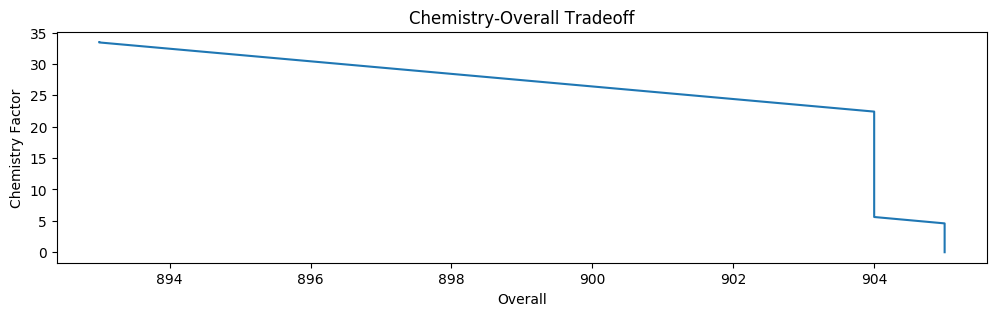

PyObject <matplotlib.text.Text object at 0x0000000003F3F5C0>

In [38]:
using PyPlot
figure(figsize=(12,3))
plot(j1,j2, "-")
title("Chemistry-Overall Tradeoff")
xlabel("Overall")
ylabel("Chemistry Factor")

#### λ vs Number of Players in chemistry (Figure 5)

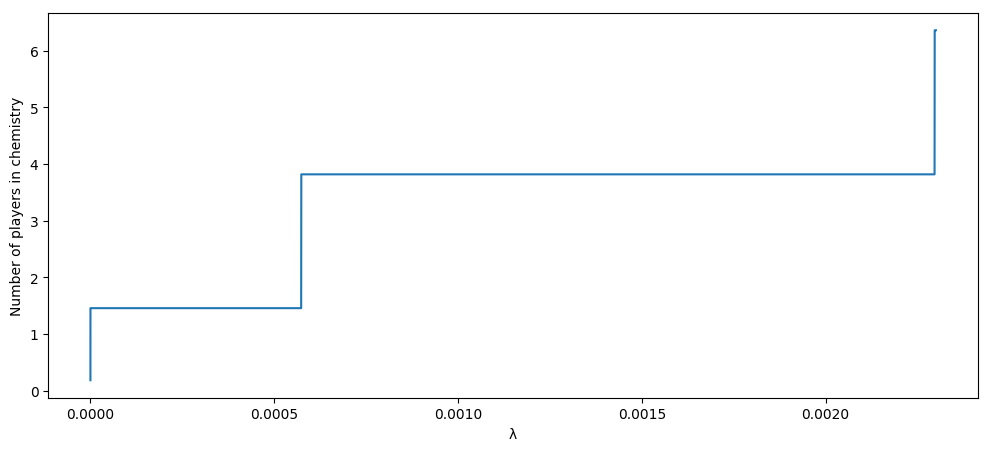

PyObject <matplotlib.text.Text object at 0x000000000373FC50>

In [33]:
figure(figsize=(12,5))
plot(lambdas, chemistry_values)
title()
xlabel("λ")
ylabel("Number of players in chemistry")

# 4. Buying Players

### 4.A Modelling Least Squares Regression to find traits

There is only a limited amount of improvement that can be made through leveraging the talent of players present in the club. But, teams such as Liverpool are often stuck with limited budgets and hence have to maximize the teams overall rating through buying players who can bring balance through improvement on certain attributes.

Each player has a set of 60 attributes that correspond to the overall rating of the player. As a manager, it is important to analyze the attributes that indicate the strengths and weaknesses in the team. Here, we create a least squares regression model and use the obtained coefficients to guide our purchase of new players. The coefficients of this model tell us which attributes the team needs to improve upon. 

We use a variable 'x' that acts as the coefficient vector which informs us of the "importance" of each attribute of our team. We try to minimize the squared difference between the product of each players individual attribute with their overall, giving us an idea of which individual attribute of each player contributes to their overall. Scaling this to the entire team gives us an idea of the strengths and weaknesses of our team.
 
`attributes` is a matrix of Nx60 as each player in the team has 60 attributes. `overall` is a vector of size N which stores the overall of each player in the club

The model is as follows,
$$
\begin{aligned}
\underset{x}{\text{minimize}} && (overall - attributes*x)^{2} \\
\end{aligned}
$$


### 4.B Using traits to inform us on future purchases

In [22]:
using JuMP, Cbc, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))
attributes = hcat(squad[:, 14:52],squad[:,54:63],squad[:,65:75]) # matrix of attributes
@variable(m, 0 <= x[1:60] <= 99)
overall = squad[:,7]
attributes = Array{Int}(attributes)
@objective(m, Min, sum((overall - attributes*x).^2))
solve(m)

Academic license - for non-commercial use only


:Optimal

Now that we have obtained the 'x', we can use it to guide our future player purchases. 

`player_values` indicates the cost of buying a player
The variable 'player_pick' is a binary variable that indicates whether we buy a player or not. 
Let 'L' indicate the number of players that are available to be bought.

Our first constraint ensures that we stay within our budget when buying new players.
'BUDGET' defines how much money we have to spend on buying new players

$$
\sum_{i = 1}^{L} player\_values_{i}*player\_pick_{i} <= BUDGET
$$

Our second constraint defines the number of player we would like to buy in order to balance our squad and improve attributes that our team doesn't perform well at.
'NUM_PLAYERS' defines the number of players we want to buy

$$ 
\sum_{i=1}^{L} player\_pick_{i} = NUM\_PLAYERS
$$

In our objective, we would like to define include have our 'x' vector help us buy new players. `weights` is a variable that takes 1-'x' in order to up-weight those attributes that we would like to improve. We normalize '`weights` to include it in our objective as follows. Let '`available_players` be an Lx60 matrix that gives us the attributes of all available players. 

$$
\begin{aligned}
{\text{maximize}} && \sum_{j=1}^{60} available\_players_{i,j}*weights_{j}\cdot player\_pick_{i} && i = \{1,\dots,L\}  \\
\end{aligned}
$$

In [34]:
# normalize weights
weights = getvalue(x)
weights = weights/maximum(weights)

# take inverse of each attribute to up-weight the characteristics that we are poor at
weights = 1.0 - weights

m1 = Model(solver=CbcSolver())

BUDGET = 1000000 # budget for spending
NUM_PLAYERS = 4 #  Number of players we would like to buy
df2 = df[find(x->x != my_team, df[:,9]),:] # narrow down dataframe only to players not in our team
df2 = df2[find(x->x != 0, df2[:,11]),:] # get rid of free agents because their actual cost is unavailable
df3 = df2
player_values = Array{Int}(df2[:, 11])
df2 = hcat(df2[:, 14:52],df2[:,54:63],df2[:,65:75]) # reduce to attributes only
attribute_names = names(df2)
df2 = Array{Int}(df2)

@variable(m1, player_pick[1:size(df2)[1]], Bin)
@constraint(m1, sum(player_values[i]*player_pick[i] for i in 1:length(player_values)) <= BUDGET) # our team has to stay in budget
@constraint(m1, sum(player_pick[i] for i in 1:length(player_values)) == NUM_PLAYERS) # we need to restrict the number of players we will buy
@objective(m1, Max, sum(vecdot((df2*weights),player_pick)))
solve(m1)
df3[find(x->x ==1 ,getvalue(player_pick)),:]

,x,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Crossing,Curve,Dribbling,Finishing,Free_kick_accuracy,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Heading_accuracy,Interceptions,Jumping,Long_passing,Long_shots,Marking,Penalties,Positioning,Reactions,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred_Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
1,2523,M. Velázquez,36,https://cdn.sofifa.org/48/18/players/142800.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,74,Club Atlético Lanús,https://cdn.sofifa.org/24/18/teams/110395.png,650000.0,€11K,2063,65,82,62,63,82,77,84,78,66,61,77,12,12,16,8,11,61,76,67,73,73,77,77,66,82,75,78,63,62,68,77,70,77,62,73.0,73.0,76.0,72.0,75.0,142800.0,73.0,73.0,73.0,75.0,76.0,72.0,73.0,69.0,72.0,74.0,CB LB,73.0,73.0,73.0,75.0,76.0,72.0,73.0,69.0,72.0,74.0,69.0
2,7536,C. Morales,37,https://cdn.sofifa.org/48/18/players/156373.png,Mexico,https://cdn.sofifa.org/flags/83.png,68,68,Lobos de la BUAP,https://cdn.sofifa.org/24/18/teams/111035.png,100000.0,€5K,1922,54,63,75,67,71,66,74,74,69,55,76,8,11,6,15,9,59,64,64,71,73,69,71,57,60,73,77,66,69,66,69,67,65,55,67.0,66.0,68.0,65.0,68.0,156373.0,67.0,67.0,66.0,68.0,68.0,65.0,66.0,64.0,66.0,68.0,LB,67.0,67.0,66.0,68.0,68.0,65.0,66.0,64.0,66.0,68.0,64.0
3,7984,M. Taylor,35,https://cdn.sofifa.org/48/18/players/53827.png,England,https://cdn.sofifa.org/flags/14.png,67,67,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,180000.0,€7K,1957,48,77,65,69,70,70,75,77,66,61,79,16,13,16,12,16,65,61,75,69,69,62,67,66,65,67,78,63,45,70,61,72,74,68,66.0,65.0,66.0,65.0,68.0,53827.0,66.0,63.0,65.0,68.0,66.0,65.0,66.0,65.0,65.0,64.0,LM CM CDM,66.0,63.0,65.0,68.0,66.0,65.0,66.0,65.0,65.0,64.0,65.0
4,11583,B. Davies,36,https://cdn.sofifa.org/48/18/players/151213.png,England,https://cdn.sofifa.org/flags/14.png,64,64,Grimsby Town,https://cdn.sofifa.org/24/18/teams/92.png,50000.0,€3K,1888,68,54,62,82,69,64,73,74,67,60,69,10,15,6,9,8,51,57,80,61,64,53,69,65,60,66,64,60,64,71,65,79,69,64,66.0,61.0,63.0,65.0,65.0,151213.0,66.0,63.0,61.0,65.0,63.0,65.0,67.0,64.0,66.0,64.0,RB,66.0,63.0,61.0,65.0,63.0,65.0,67.0,64.0,66.0,64.0,64.0


Academic license - for non-commercial use only


#### Difference between squad without old players vs with new players (Figure 6)

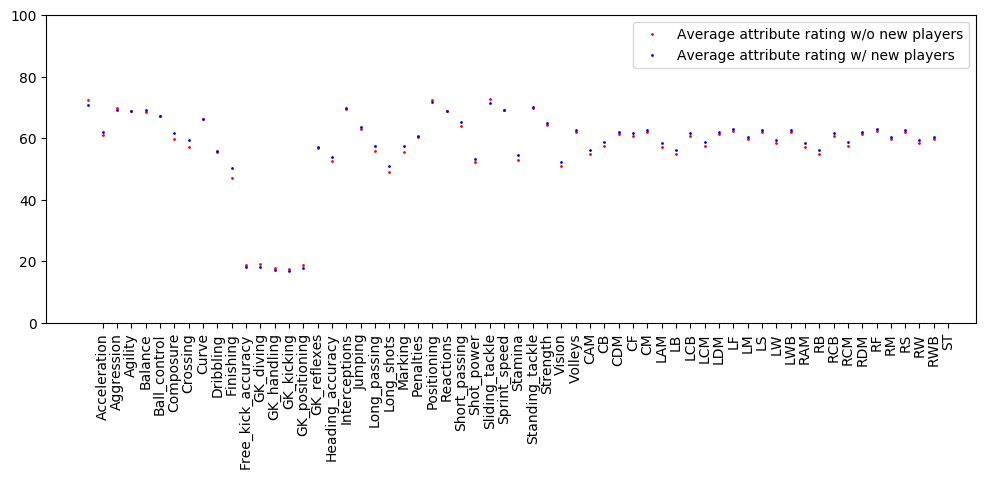

PyObject <matplotlib.legend.Legend object at 0x0000000002EFB1D0>

In [37]:
import PyPlot; const plt = PyPlot
ax = figure(figsize=(12,4))
plt.plot(transpose(attributes)*ones(size(attributes)[1])/size(attributes)[1], "r.", markersize = 2)
plt.ylim((0,100))
plt.xticks(1:60,Array{String}(attribute_names), rotation="vertical")
new_picks = df3[find(x->x ==1 ,getvalue(player_pick)),:]
squad2 = vcat(squad, new_picks)
size(squad2)
attributesNew = hcat(squad2[:, 14:52],squad2[:,54:63],squad2[:,65:75])
attributesNew = Array{Int}(attributesNew)
plot(transpose(attributesNew)*ones(size(attributesNew)[1])/size(attributesNew)[1], "b.", markersize = 2)
legend(["Average attribute rating w/o new players", "Average attribute rating w/ new players"], loc = "upper right")

# Results

It is evident from our analysis that we are able to construct a team using players at hand. Our individual players is quite high, and enables us as a team to be able to compete against different, stronger teams.Our initial construction allowed us to position players in their preferred positions, and hence building an optinal playing eleven. Furthermore in our initial construction of an optimal team, we were able to account for two factors that contribute to good chemistry, which is players playing the same club and their preferred position.


Then we intended on tackling the third issue, which was incorporating players from the same country in order to boost our chemistry. We did this by considering each position to be unique and having its own effect in building the overall team chemistry.

The following image shows us the construction of an optimal team without the use of team chemistry:
#### Figure 7

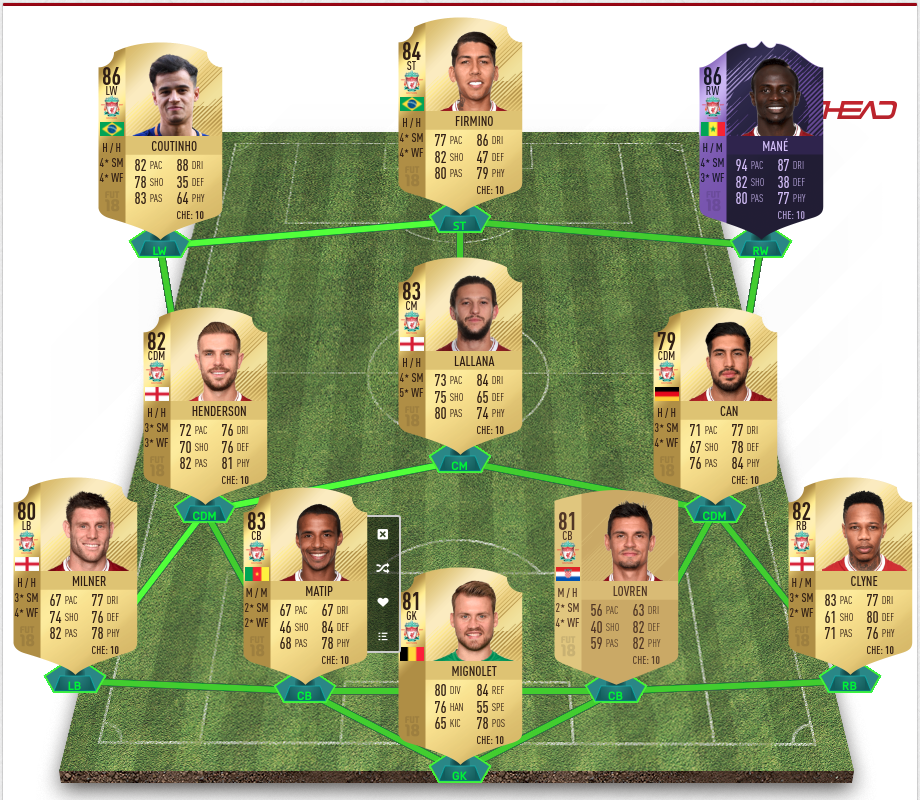

In the above figure, the light green edges between positions/players indicates that two players hail from the same country. In the above figure, we can see three edges which are light green indicating high player chemistry between those players. We also note that these players connected by these light green edges are from the same nation.

The figure below illustartes an optimal team created when chemistry is taken into account.:

#### Figure 8
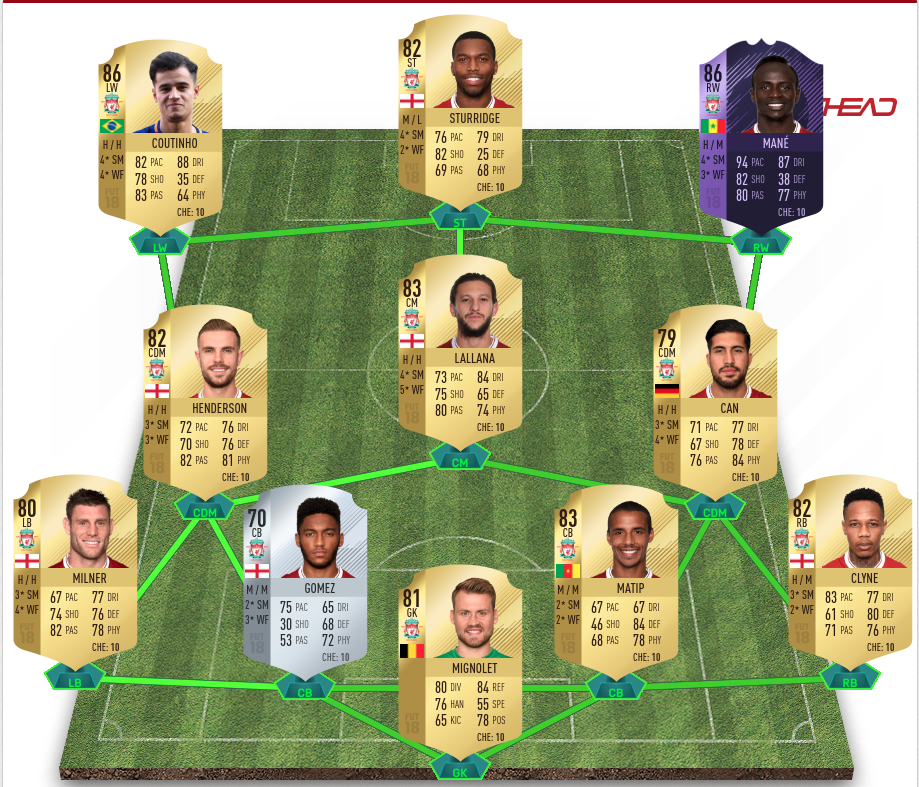

In the above figure, we see 5 green lines as opposed to the three seen in Figure 7. An important thing to notice is that the average player rating decreases. We sought to investigate this further

Figure 4 indicates chemistry vs overall trade-off, we can clearly see as we increase chemistry the overall rating of our team reduces. An increase in the lambda value allows us to increase the number of players that we intend to have in chemistry with each other. We notice that, this increase in the number of players is proportional to the loss of overall.

Upon noticing that no further improvements can be made in creating an optimal team with players at hand, we sought to invest in new players, in order to improve and balance the average atrributes of our team. Using a least squares regression model, we found the factor by which a players individual attribute approximately. This vector of weights tell us the attributes that "make" our team. Since we want players who boost our weaker atrributes, while not affecting our strengths. Therefore, we use these weights as a factor that influences our future purchases. Furthermore as a club with budget constraints, we look to buy cheap players who can positively impact our team.

Figure 6 illustartes this fact in a visual manner.As we can see, a large number of attributes have jumped to higher values due to the purchase of four players that lie within our budget. 

One critical limitation that our model suffers from is the fact that the players ability can be quantified. Although these values for the players are meant to indicate their general performance, it is not possible to accurately base our judgement on these numbers, as players tend to fluctuate in performance between seasons.

It is not necessary that chemistry is only improved through the inclusion of players from the same country. IN reality, players from different countries train to together for the same club, develop a chemistry that can be significantly better than the players from the same country, essentially chemistry should depend more upon other facits such as practice and training as opposed to simply being from the same nation.

In our fourth model, we have manually set budget and player constraints. In reality, these values for budget can scale anywhere between 100,000 pounds to 500,000,000 million pounds or higher 

# Conclusion

In conclusion, we have seen how we can create an optimal soccer playing team with players at hand.
Then we analyzed how we can create an optimal squad, by increasing oue chemistry, and maininting our overall. During this analyzes we notice that there is a trade-off between chemistry and overall.As we reached the limits of maximizing players at hand, we look to buying new players on a budget such that they improve our club.

A future direction, we thought of was simulating competitions between teams in order to predict, who will win. At hand we have the dataset of every player playing at every club, associated with FIFA(Federation International Football Association). We would like to use our first model of builiding an optimal for every club in the English Premier League, and predict the likelihood of a winner in a game.Using this prediction, we would liek to simulate an entire season of the English Premier League and comapre our results to an actual standings table of the English Premier League. Using this managers can know how they might fare in the future seasons, and use our third model to improve their team.Furthermore, we would also like to calculate the error between the actual standings and our simulated standing in order to improve our future predictions.

As a side note, users of this model can change the "my_team" variable defined in cell 12 to a club of their choice to repeat the analysis.But, they must also be aware of the players available for different positions in their club as some formations may not work for different clubs as they may not have the appropriate player for that position.Furthermore, they must also include a new "linkup" matrix that corresponds to the formation of their choice. Contact authors for assistance with this. 